# **1.Context & Objetive**
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

# **2.Data information**
- CustomerID: A unique ID that identifies each customer.
- Gender: The customer’s gender: Male, Female.
- Senior Citizen: Indicates if the customer is 65 or older: Yes, No.
- Patner: Whether the customer has a partner or not (Yes, No).
- Dependents: Whether the customer has dependents or not (Yes, No).
- tenure: Number of months the customer has stayed with the company.
- PhoneService: Whether the customer has a phone service or not (Yes, No).
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service).
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service).
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service).
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service).
- StreamingMovies: Whether the customer has streaming TV or not (Yes, No, No internet service).
- Contract:The contract term of the customer (Month-to-month, One year, Two year).
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No).
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).
- MonthlyCharges: The amount charged to the customer monthly.
- TotalCharges: The total amount charged to the customer.
- Churn: Whether the customer churned or not (Yes or No).

# **3. Import library and data**

In [ ]:
#Import library
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
## Import sklearn 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

In [ ]:
# import file from googlesheet
gsheetid= "10V2Yz0s-vW1SgrAtLjk8MA0CS30vQD0q9jHmxwmD03k"
sheet_name ='Telco-Customer-Churn'
gsheet_url= "https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(gsheetid,sheet_name)
df = pd.read_csv(gsheet_url)

In [ ]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# **4. EDA**

## 4.1 Data type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 4.2 Check null 

In [ ]:
df1 = df.copy()

In [ ]:
## check null
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df[np.isnan(df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


- cột total charges có 11 dòng có missing value -> cần xử lý các missing values này và cột customerID

In [ ]:
## delete rows with null values
df =df.dropna()

In [ ]:
## change values in column SeniorCitizen
df['SeniorCitizen'].replace({0: 'No', 1:'Yes'}, inplace = True)

<ipython-input-455-dd74f7fd4d50>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
## bỏ cột customerID
df = df.drop(['customerID'], axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


- Data có 21 cột và 7032 dòng
- trong 21 cột có 3 cột là Numerical data và số còn lại là Categorical 
- trong các cột categorial data thì chia thành 2 loại nominal và binary data

## 4.3 Change values in columns:
- "MultipleLines"
- "OnlineSecurity"
- "OnlineBackup"
- "DeviceProtection"
- "TechSupport"
- "StreamingTV"
- "StreamingMovies"
- "DeviceProtection"

In [ ]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')
df['OnlineSecurity'] = df['OnlineSecurity'].replace('No internet service', 'No')
df['OnlineBackup'] = df['OnlineBackup'].replace('No internet service', 'No')
df['DeviceProtection'] = df['DeviceProtection'].replace('No internet service', 'No')
df['TechSupport'] = df['TechSupport'].replace('No internet service', 'No')
df['StreamingTV'] = df['StreamingTV'].replace('No internet service', 'No')
df['StreamingMovies'] = df['StreamingMovies'].replace('No internet service', 'No')

## 4.3 Statistics of Categorical & Numerical data

### 4.3.1 Statistics of Numerical data

In [ ]:
## Check numerical data
round(df.describe(include =['float64','int64']),2)

,tenure,MonthlyCharges,TotalCharges
count,7032.00,7032.00,7032.00
mean,32.42,64.80,2283.30
std,24.55,30.09,2266.77
min,1.00,18.25,18.80
25%,9.00,35.59,401.45
50%,29.00,70.35,1397.48
75%,55.00,89.86,3794.74
max,72.00,118.75,8684.80


In [ ]:
## Visualize statistics of numerical data
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=3)
ax1 = fig.add_trace(px.box(df, y="tenure",).data[0], row=1, col=1)
fig.update_xaxes(title_text = "Tenure", row = 1 , col=1)
fig.update_traces(marker=dict(color='#4d759a'),row = 1 , col=1)
ax2 = fig.add_trace(px.box(df, y="MonthlyCharges").data[0], row=1, col=2)
fig.update_xaxes(title_text = "Monthly Charges", row = 1 , col=2)
fig.update_traces(marker=dict(color='#44aa99'),row = 1 , col=2)
ax2 = fig.add_trace(px.box(df, y="TotalCharges").data[0], row=1, col=3)
fig.update_xaxes(title_text = "Total Charges", row = 1 , col=3)
fig.update_traces(marker=dict(color='#dfa700'),row = 1 , col=3)
fig.update_layout(title="Boxplot Numerical Data")
fig.show()

- trung bình mọi người sử dụng dịch vụ trong 29 tháng, mỗi tháng trả 70,35 và giá tổng phải trả là 1.397.457 
- không có outlier trong các dữ liệu của tenure, monthly charges và total charges

In [ ]:
## Select Numerical data with churn is 'yes'
df_c = df[df['Churn'] == 'Yes']
df_c=df_c[['tenure',	'MonthlyCharges',	'TotalCharges']]

In [ ]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=3)
ax1 = fig.add_trace(px.box(df_c, y="tenure",).data[0], row=1, col=1)
fig.update_xaxes(title_text = "Tenure", row = 1 , col=1)
fig.update_traces(marker=dict(color='#4d759a'),row = 1 , col=1)
ax2 = fig.add_trace(px.box(df_c, y="MonthlyCharges").data[0], row=1, col=2)
fig.update_xaxes(title_text = "Monthly Charges", row = 1 , col=2)
fig.update_traces(marker=dict(color='#44aa99'),row = 1 , col=2)
ax2 = fig.add_trace(px.box(df_c, y="TotalCharges").data[0], row=1, col=3)
fig.update_xaxes(title_text = "Total Charges", row = 1 , col=3)
fig.update_traces(marker=dict(color='#dfa700'),row = 1 , col=3)
fig.update_layout(title="Boxplot Numerical Columns with churn is 'Yes'")
fig.show()

- đối với những người đã churn, Tenure có những outliner và những người dùng dịch vụ từ tháng 70 trở lên, total charges cũng có outliner  -> những người có thể là những người chỉ dùng thử dịch vụ, hoặc khi bị charges phí quá cao

<ipython-input-463-3d22c08ae4a2>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-463-3d22c08ae4a2>:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




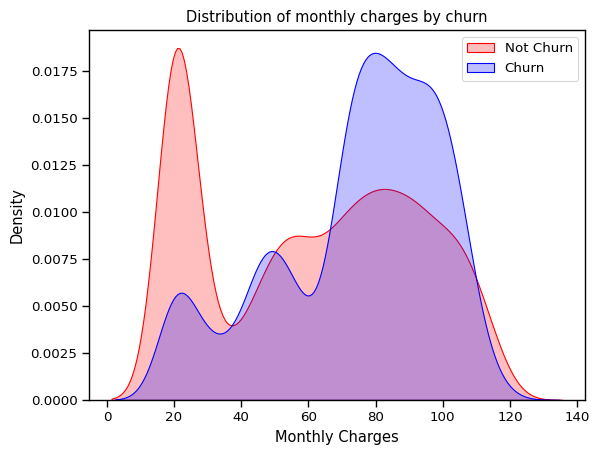

In [ ]:
## Distribution of Monthly Charges
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

<ipython-input-464-d34b9f0e4e06>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-464-d34b9f0e4e06>:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




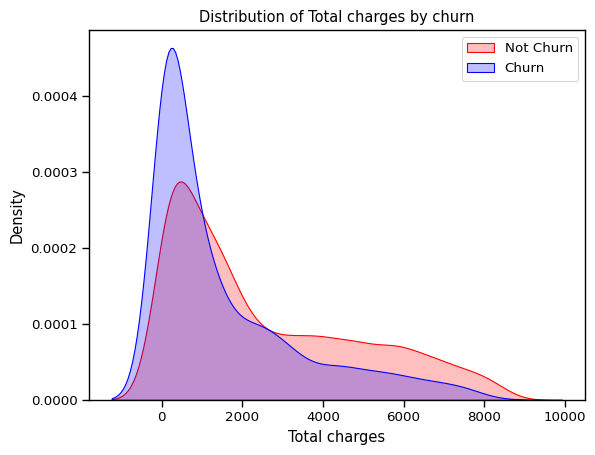

In [ ]:
## Distribution of Total Charges
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total charges');
ax.set_title('Distribution of Total charges by churn');

- tỉ lệ churn của total charges cao ở ngưỡng từ 0-2000

### 4.3.2 Statistics of Categorical data

In [ ]:
## Check Categorical data
df.describe(include =['object'])

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,2,2,3,2,2,2,2,2,2,3,2,4,2
top,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,5890,3639,4933,6352,4065,3096,5017,4607,4614,4992,4329,4301,3875,4168,2365,5163


  Churn  values
0    No    5163
1   Yes    1869
[Text(0.5, 1.0, 'Churn')]


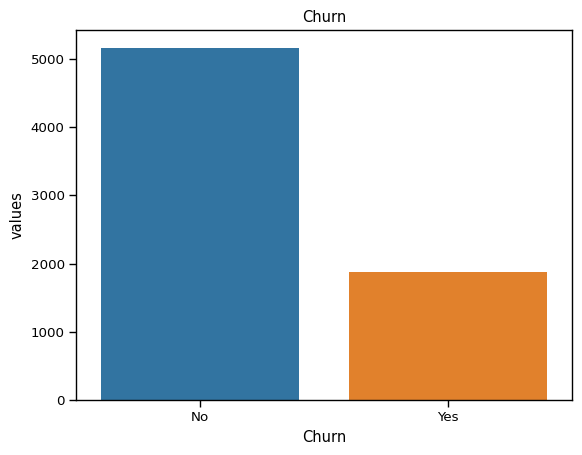

In [ ]:
##Group by churn
df_churn = df.groupby(by='Churn').agg(values =("Churn","count")).reset_index()
total = len(df['Churn'])
## Bar chart with seaborn
churn_bar = sns.barplot(data = df_churn, x= 'Churn', y ='values').set(title = "Churn")
print(df_churn)
print(churn_bar)

- số người churn là 1869 và những người k churn là 5163

In [ ]:
from plotly.subplots import make_subplots
# Create subplots with a single subplot
fig = make_subplots(rows=1, cols=1)
# Define the labels and values for the pie chart
labels = ['No', 'Yes']
values = df['Churn'].value_counts()
# Add a pie chart trace to the subplot
ax1=fig.add_trace(px.pie(labels = labels, values = values).data[0])
# Add labels to the pie chart
fig.update_traces(textposition='inside', textinfo='label+percent')
fig.update_traces(labels = labels)
# Update the layout of the figure
fig.update_traces(title_text = "Churn Rate")
# Show the figure
fig.show()

- tỉ lệ churn là 26.6% 

In [ ]:
## Create dataframe for only Churn
df_churn = df[df['Churn'] == 'Yes']
## Draw chart of categorical data with churn
def countplot_applicants_churn(features):
    for feature in features:
        plt.figure(figsize=(6, 6))
        ax=sns.countplot( y= df_churn[feature],data=df_churn)
        plt.legend(loc='best')
        total = len(df_churn[feature])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()

In [ ]:
df_churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

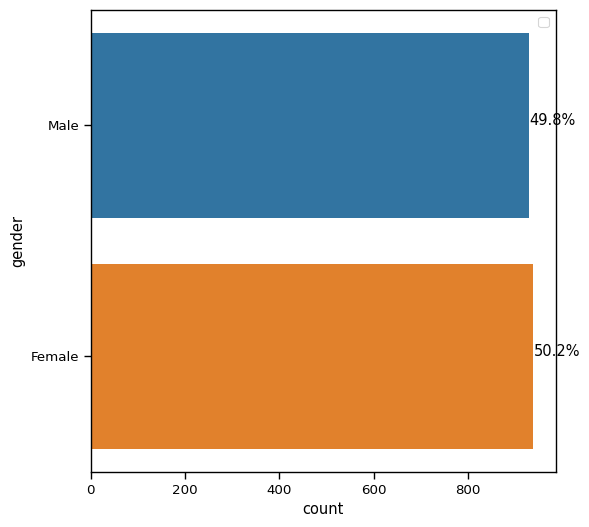

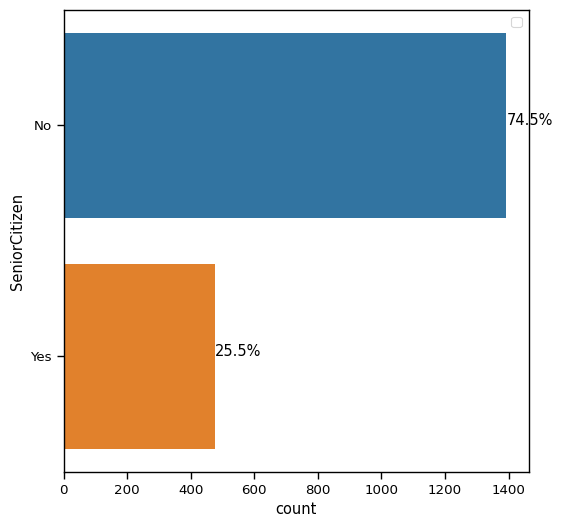

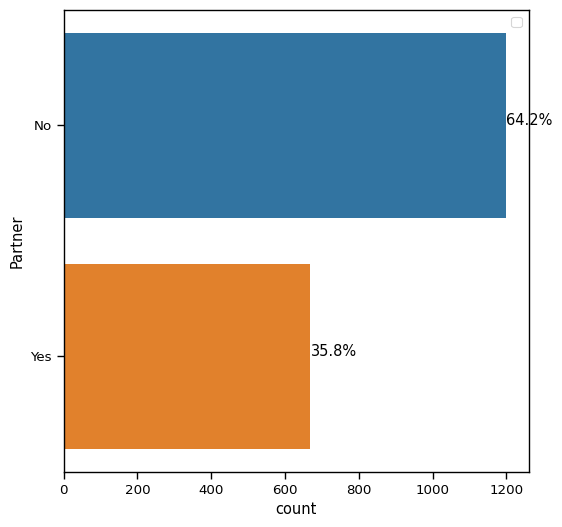

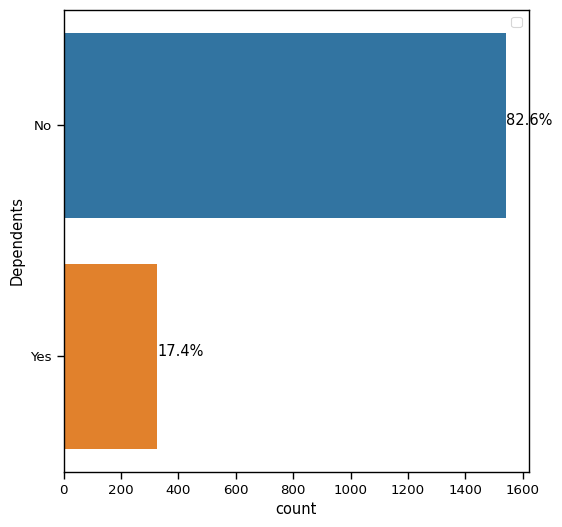

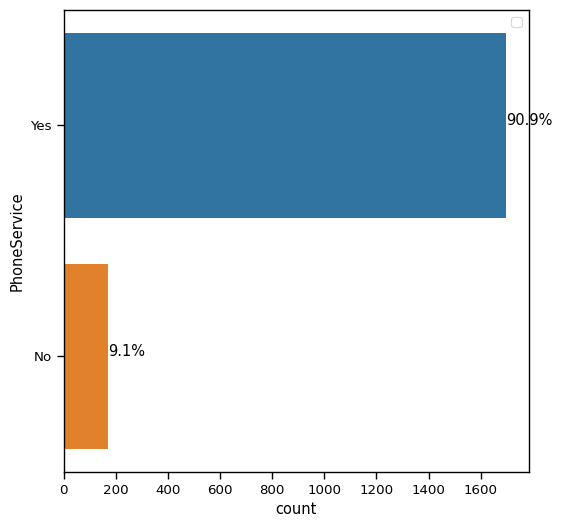

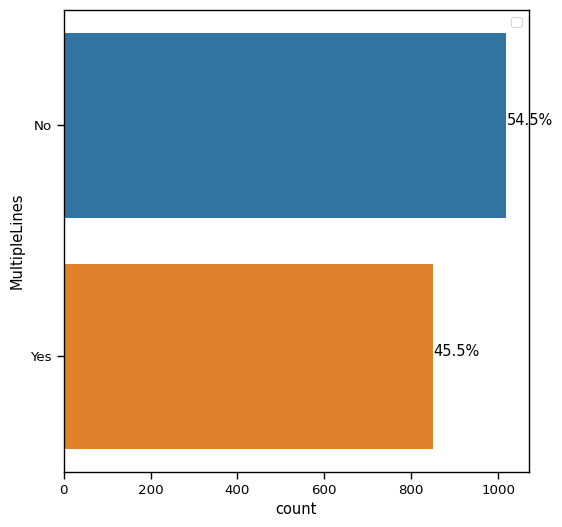

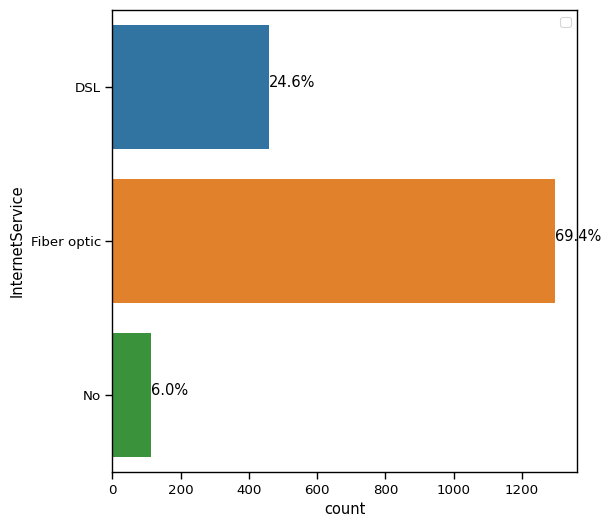

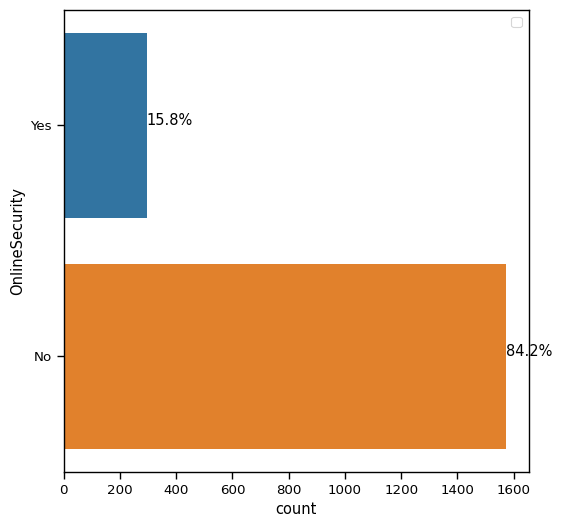

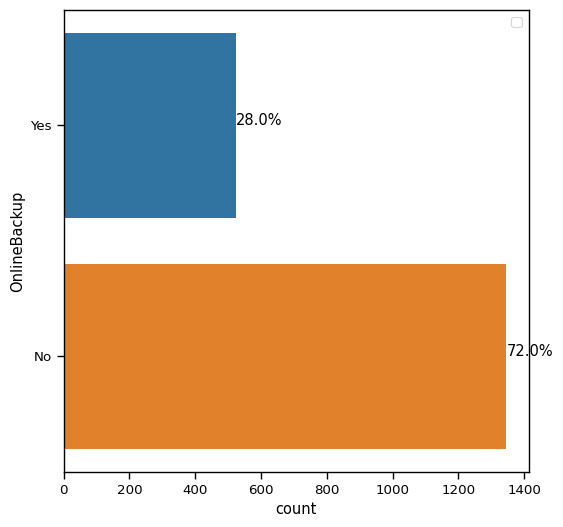

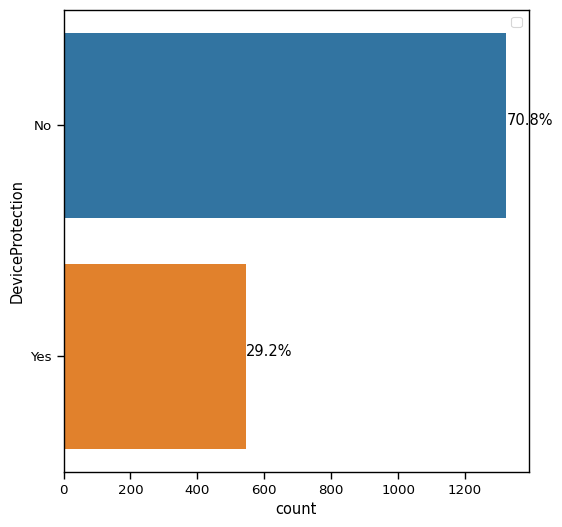

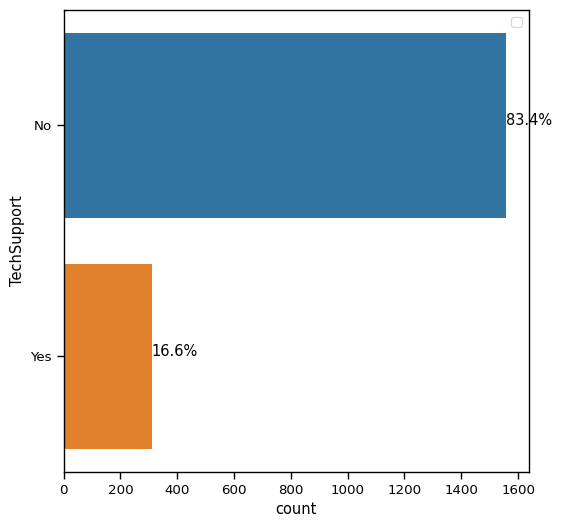

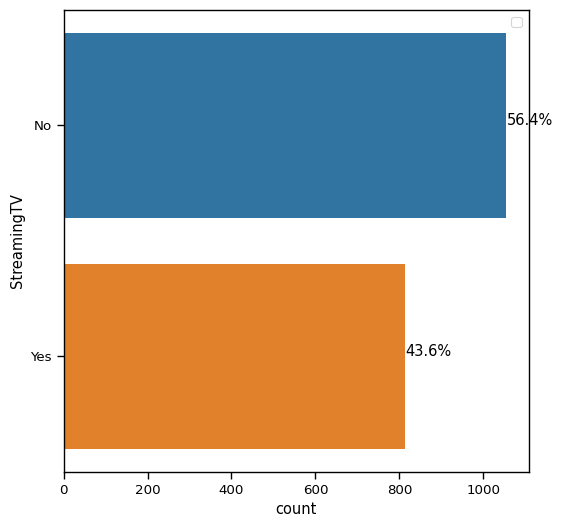

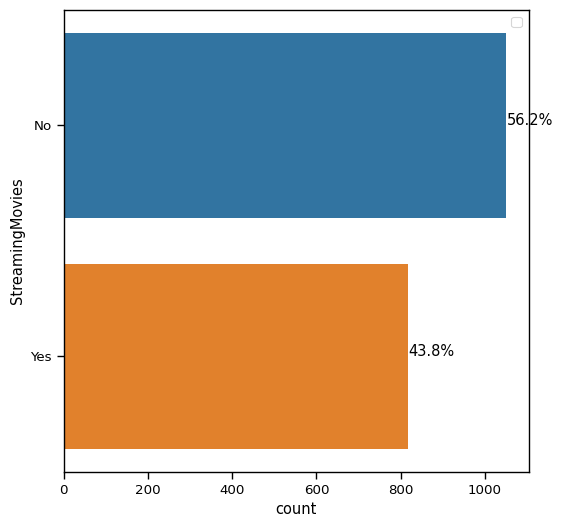

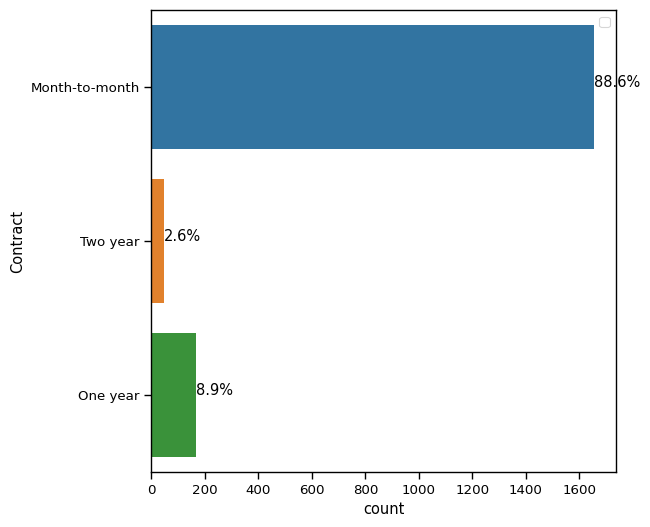

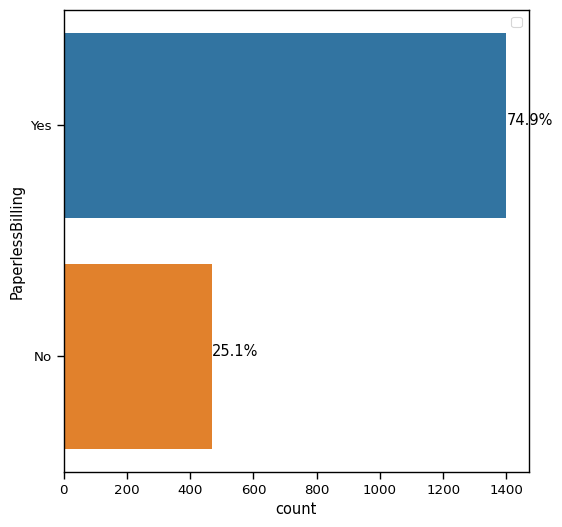

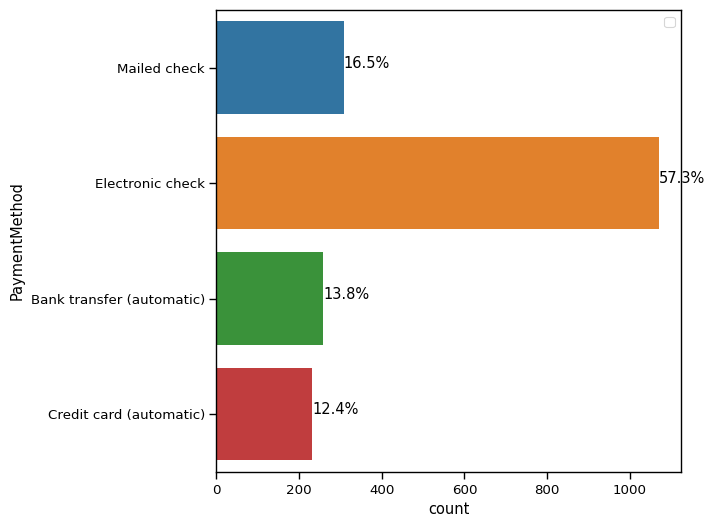

In [ ]:
countplot_applicants_churn(['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])

**Insight data của churn customer**
- tỉ lệ nữ giới và nam giới tương đương nhau
- Khác hàng > 65t có tỉ lệ churn cao hơn là những khách hàng khác
- đa phần là những người sống độc lập  
- Họ có sử dụng Phone Service , internet serivce chủ yếu là Fiber optic
- họ không sử dụng các dịch vụ khác như deviceProtection, techsupport, online security hay onlinebackup
- tỉ lệ churn của những người sử dụng hoặc không các dịch vụ streamingtv hoặc streamingMovies là không quá khác biệt
- hợp đồng thường là hàng tháng 1, có hóa đơn và phương thức thanh toán là Electronic check

In [ ]:
## Create dataframe for no churn
df_churn2 = df[df['Churn'] == 'No']
## Draw chart of categorical data with no churn
def countplot_applicants_nochurn(features):
    for feature in features:
        plt.figure(figsize=(6, 6))
        ax=sns.countplot( y= df_churn2[feature],data=df_churn2)
        plt.legend(loc='best')
        total = len(df_churn2[feature])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()

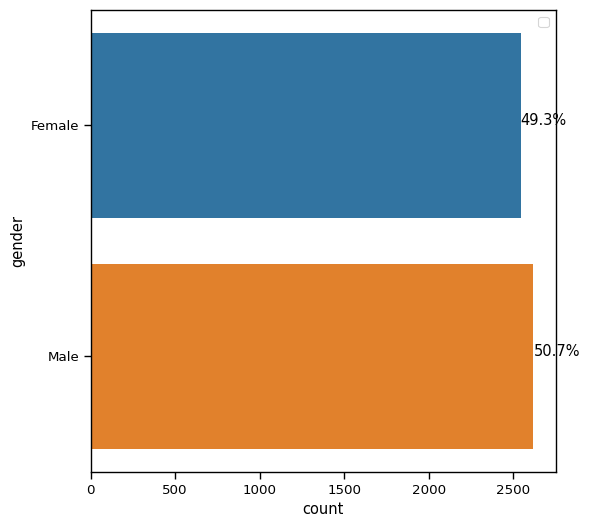

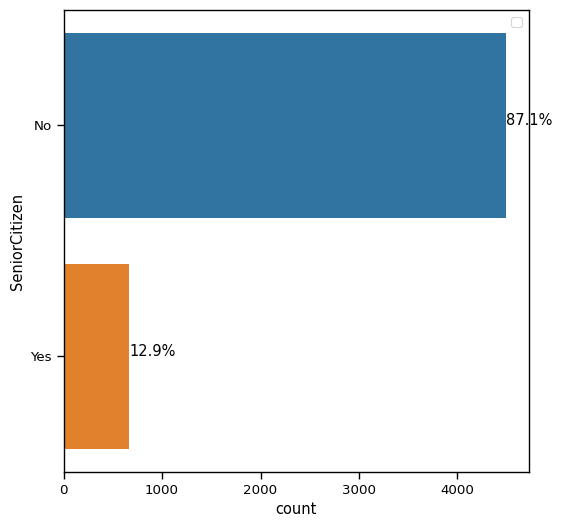

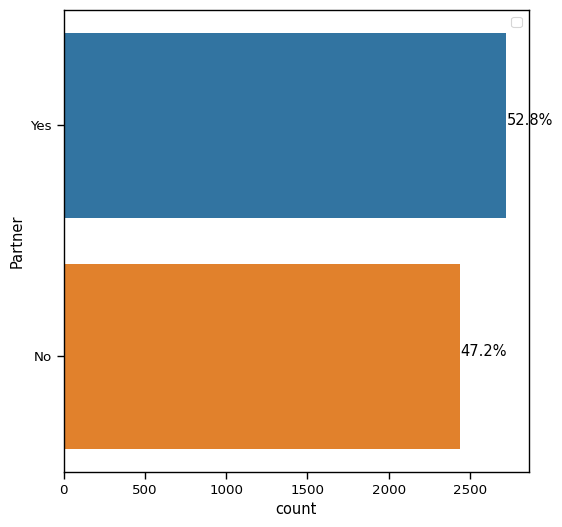

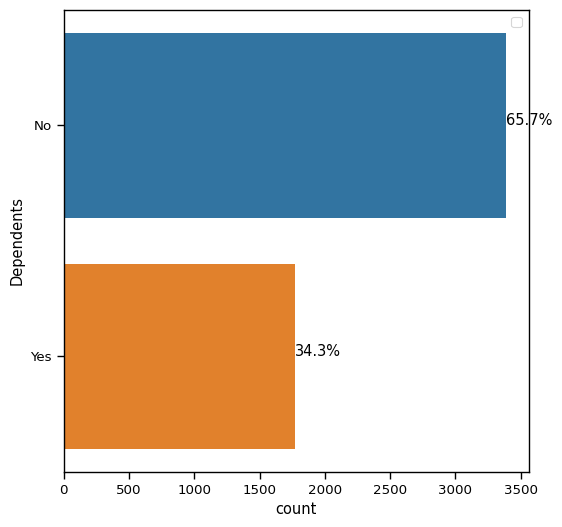

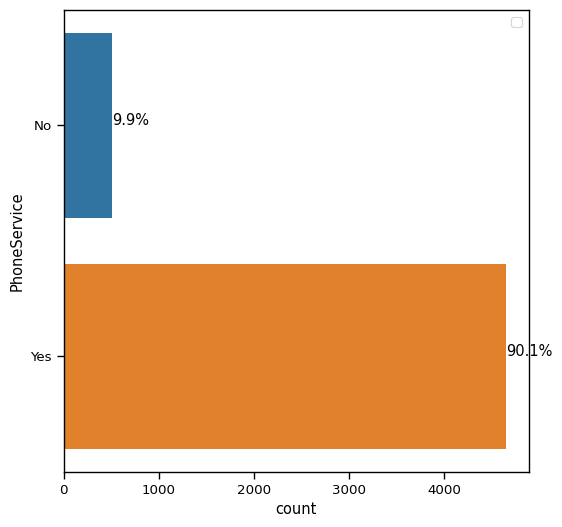

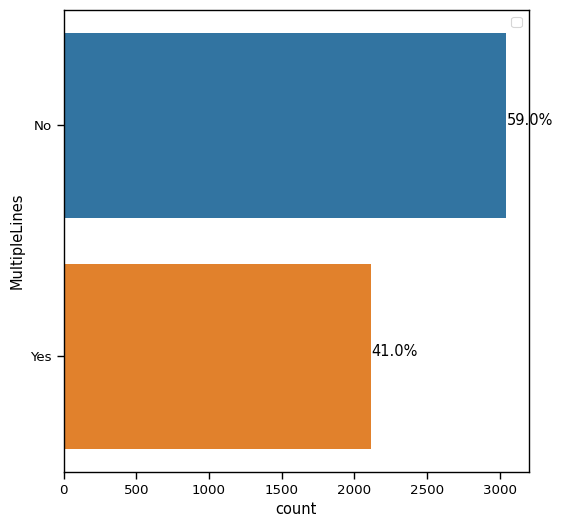

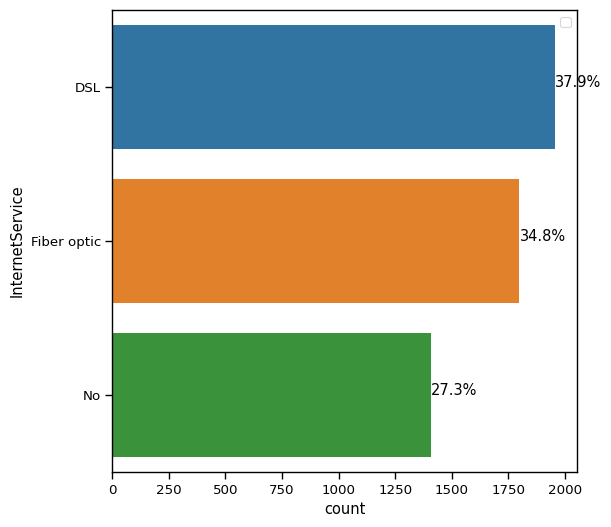

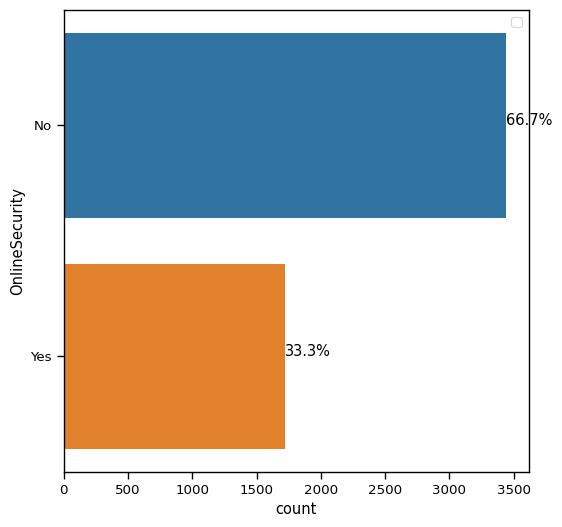

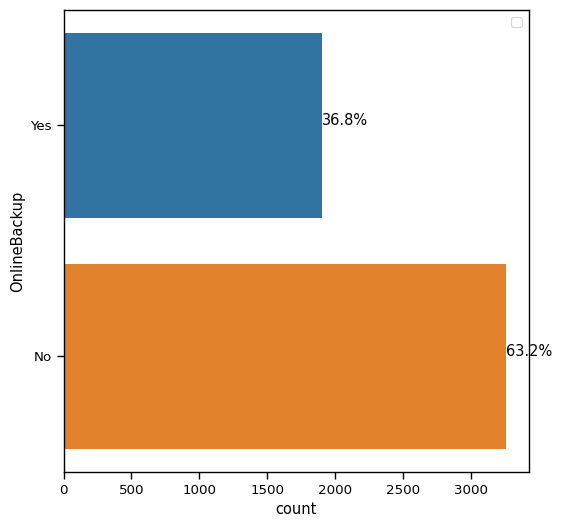

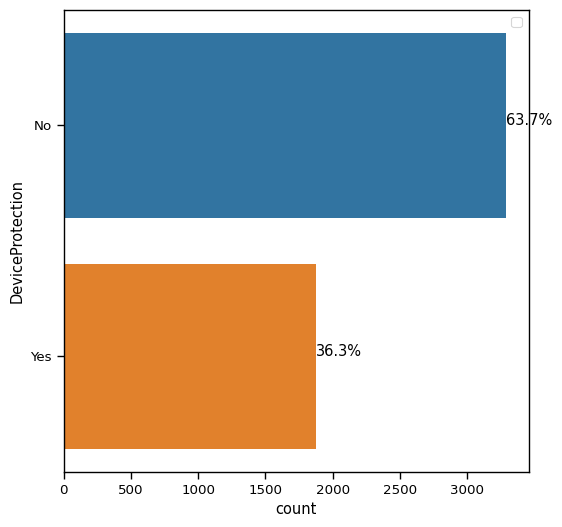

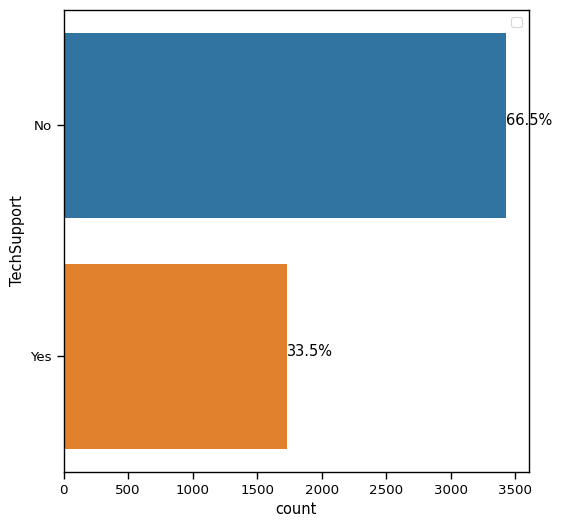

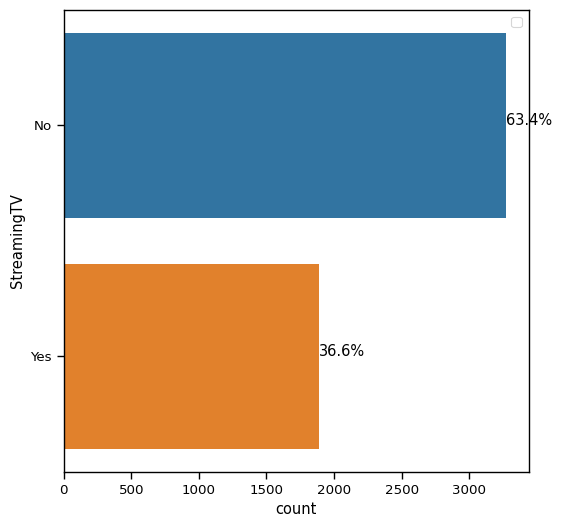

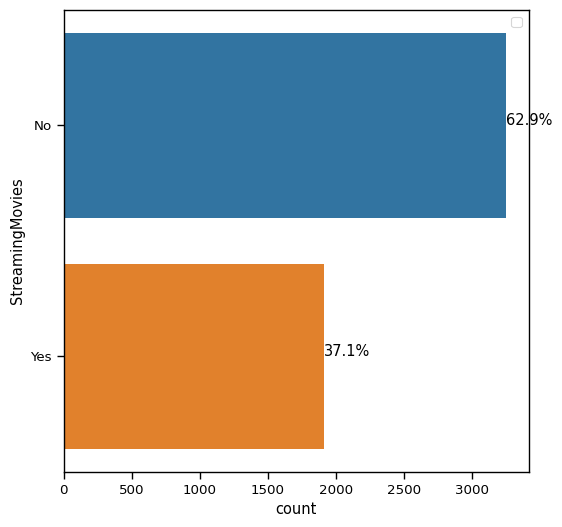

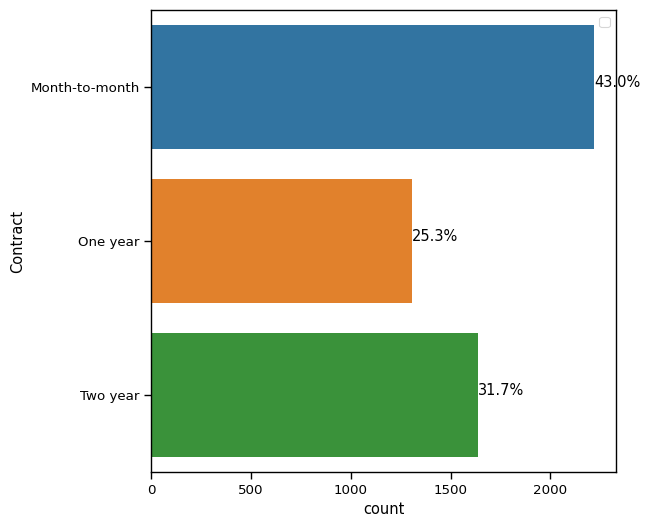

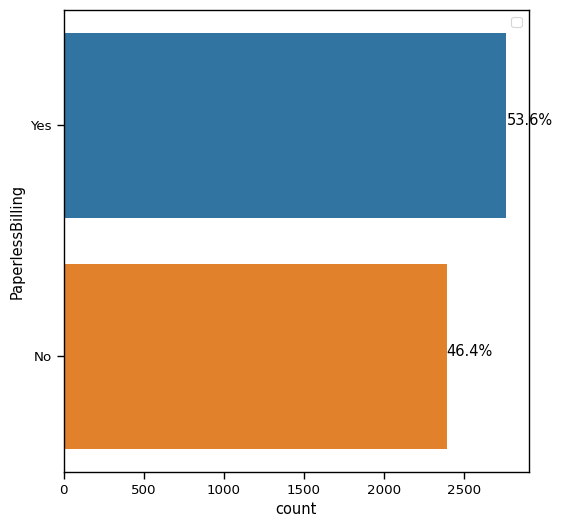

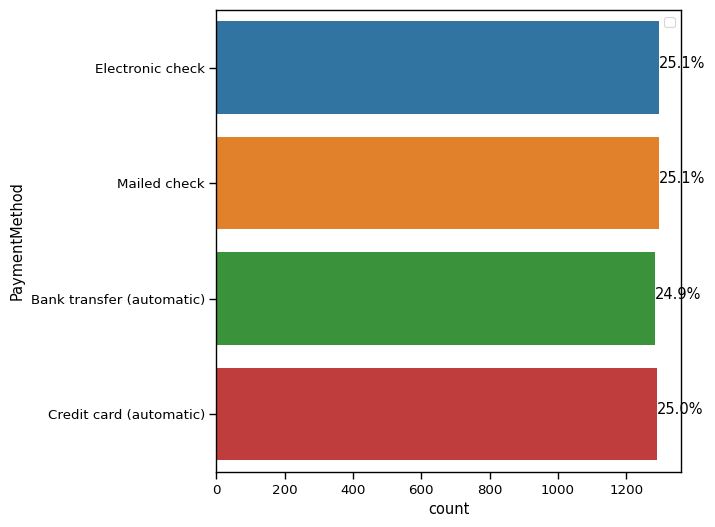

In [ ]:
countplot_applicants_nochurn(['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])

# **5. Data processing**


In [ ]:
## Duplicate dataframe
df2 = df.copy()

In [ ]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## 5.1 Data enconding & Normalize

### 5.1.1 Data Label encoding 
- gender
- SeniorCitizen
- Partner
- Dependents
- PhoneService
- MultipleLines
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV 
- StreamingMovies
- PaperlessBilling
- Churn
- PaymentMethod
- Contract
- InternetService

In [ ]:
## Label encoding 
col = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling','PaymentMethod','Contract','InternetService',
       'Churn']
df2[col] = df2[col].apply(LabelEncoder().fit_transform)

- PaymentMethods: Mailcheck = 3, Electronick check  = 2, Bank transfer (automatic)	= 0
- gender: Female = 0, male = 1
- Internet service Dsl = 0, Fiber optic = 1, no = 3

In [ ]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.280248,0,0,0,0,1,0,0,0,0,0,1,2,-1.161694,-0.994194,0
1,1,0,0,0,0.064303,1,0,0,1,0,1,0,0,0,1,0,3,-0.260878,-0.173740,0
2,1,0,0,0,-1.239504,1,0,0,1,1,0,0,0,0,0,1,3,-0.363923,-0.959649,1
3,1,0,0,0,0.512486,0,0,0,1,0,1,1,0,0,1,0,0,-0.747850,-0.195248,0
4,0,0,0,0,-1.239504,1,0,1,0,0,0,0,0,0,0,1,2,0.196178,-0.940457,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,-0.343137,1,1,0,1,0,1,1,1,1,1,1,3,0.664868,-0.129180,0
7039,0,0,1,1,1.612573,1,1,1,0,1,1,0,1,1,1,1,1,1.276493,2.241056,0
7040,0,0,1,1,-0.872808,0,0,0,1,0,0,0,0,0,0,1,2,-1.170004,-0.854514,0
7041,1,1,1,0,-1.158016,1,1,1,0,0,0,0,0,0,0,1,3,0.319168,-0.872095,1


In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,No,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### 5.1.2 Data normalize

In [ ]:
# Select columns numerical data
col1 = ['tenure','MonthlyCharges',	'TotalCharges']
# Normalize data with standardscaler
scaler= StandardScaler()
df2[col1] = scaler.fit_transform(df2[col1])

# **6. Processing model K-means**


## 6.1 Select feature for k-means
- bởi vì total Charges với monthly charges có sự biến thiên nên khi áp dụng k-means nên chọn 1
- các cột chọn sẽ là churn = "yes'
- tenure và monthly charges

In [ ]:
## select tenure and monthlycharges with churn 
df3 = df2[df2.Churn==1][['tenure','MonthlyCharges']]

## 6.2 find k optimized

### 6.2.1 find k optimized with Elbow method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

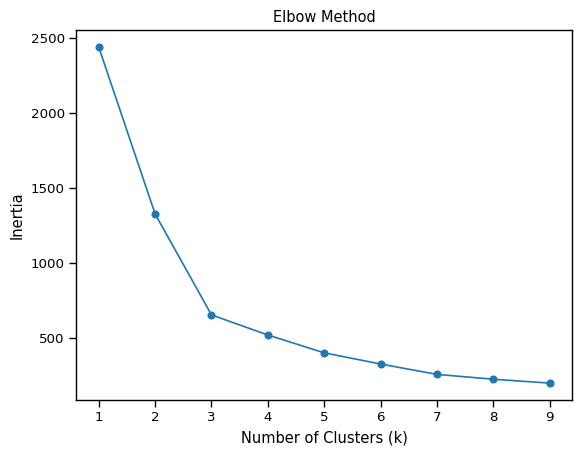

In [ ]:
## Find k with Elbow method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df3)
    inertia.append(kmeans.inertia_)
# Visualization elbow
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

### 6.2.2 find k optimized with Silhouete method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-479-3e13de522d53>:30: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-479-3e13de522d53>:30: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/clus

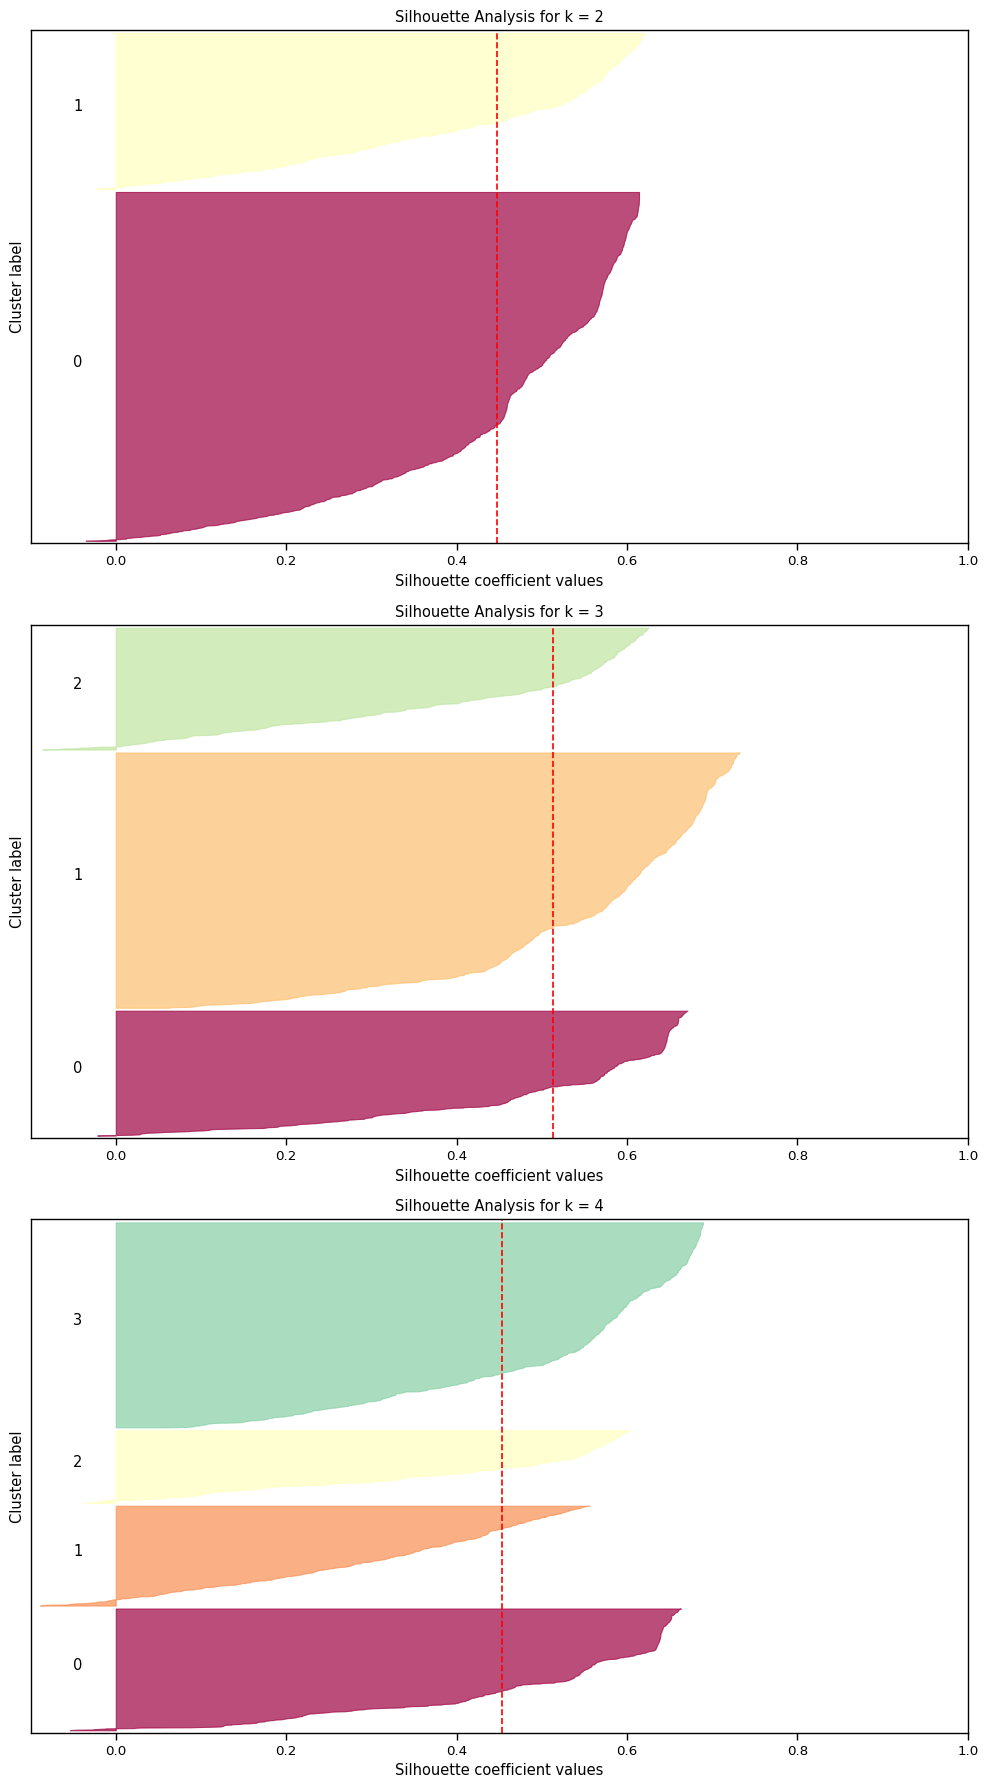

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
# Rank of k
k_values = range(2, 5)

# Create subplot for Silhouette method
fig, ax = plt.subplots(len(k_values), 1, figsize=(10, 6*len(k_values)))

# loop for each K
for i, k in enumerate(k_values):
    # Phân cụm dữ liệu và tính toán Silhouette Score
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df3)
    silhouette_avg = silhouette_score(df3, cluster_labels)
    
    # Calculate Silhouette Score for each point data
    silhouette_values = silhouette_samples(df3, cluster_labels)
    
    # Visualize Silhouette
    y_lower = 10
    for j in range(k):
        
        cluster_silhouette_values = silhouette_values[cluster_labels == j]
        cluster_silhouette_values.sort()
        
        cluster_size = cluster_silhouette_values.shape[0]
        y_upper = y_lower + cluster_size
        
        # Màu sắc cho từng nhóm trong biểu đồ Silhouette
        color = plt.cm.get_cmap("Spectral")(j/k)
        
        # Vẽ biểu đồ Silhouette cho nhóm j
        ax[i].fill_betweenx(range(y_lower, y_upper), 0, cluster_silhouette_values,
                            facecolor=color, edgecolor=color, alpha=0.7)
        ax[i].text(-0.05, y_lower + 0.5 * cluster_size, str(j))
        
        # Cập nhật giá trị y_lower cho nhóm tiếp theo
        y_lower = y_upper + 10
    
    # Định dạng biểu đồ Silhouette
    ax[i].set_title(f"Silhouette Analysis for k = {k}")
    ax[i].set_xlabel("Silhouette coefficient values")
    ax[i].set_ylabel("Cluster label")
    ax[i].set_xlim([-0.1, 1])
    ax[i].set_ylim([0, len(df3) + (k + 1) * 10])
    ax[i].axvline(x=silhouette_avg, color="red", linestyle="--")
    ax[i].set_yticks([])

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

-  Elbow method thì cho kết quả k tối ưu = 3
- Cũng như phương pháp Elbow, Silhouette cho kết quả tối ưu với k = 3

## 6.3 Clustering procesing

In [ ]:
## with k = 3
kmeans = KMeans(n_clusters=3, random_state =42)
clusters = kmeans.fit_predict(df3)
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
kmeans.cluster_centers_

array([[-1.00283861, -0.87984357],
       [-0.9622307 ,  0.63146178],
       [ 0.61811543,  0.89940758]])

In [ ]:
## select cluster label
labels = kmeans.labels_

## adding label to df2
df3['Cluster'] = clusters

## print result
print(df3['Cluster'].value_counts())

1    950
0    465
2    454
Name: Cluster, dtype: int64


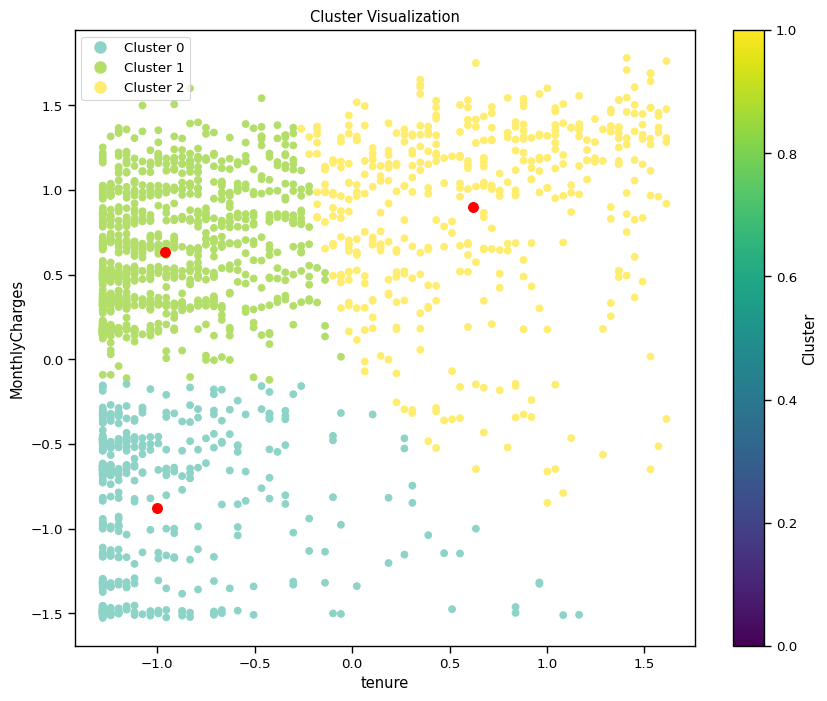

In [ ]:
## Visualize with scatter plot
plt.figure(figsize =(10, 8))
scatter = plt.scatter(df3['tenure'], df3['MonthlyCharges'], c=df3['Cluster'], cmap = 'Set3')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o', color='red', s=50, label='Cluster Centers')
# Tạo custom legend cho từng nhóm cụm
cluster_labels = sorted(df3['Cluster'].unique())
legend_handles = [plt.Line2D([], [], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=10) for label in cluster_labels]
legend_labels = ['Cluster {}'.format(label) for label in cluster_labels]
plt.legend(legend_handles, legend_labels)
#add more xlabel,y label and title
plt.xlabel('tenure')
plt.ylabel('MonthlyCharges')
plt.title('Cluster Visualization')
plt.colorbar(label='Cluster')
plt.show()

Với k = 3, ta có thể phân thành 3 nhóm như sau:
- Cluster 1: High Monthly Charge và low tenure
- Cluster 2: High Monthly Charges và high tenure
- Cluster 0: Low Monthly Charges và low tenure 

<ipython-input-484-b9b78c762d38>:6: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



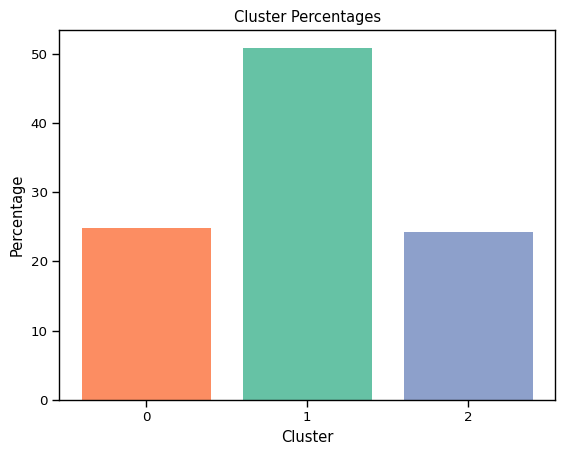

In [ ]:
from matplotlib.cm import get_cmap
## Calculate percent of each cluster and visualize with barchart
cluster_count = df3['Cluster'].value_counts(normalize=True)
cluster_percent = cluster_count/cluster_count.sum()*100
# Created color for each cluster
cmap = get_cmap('Set2')
colors = cmap(range(len(cluster_labels)))
# Visualize bar chart
plt.bar(cluster_percent.index, cluster_percent.values, color=colors)
plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.title('Cluster Percentages')
plt.xticks(cluster_percent.index)
plt.show()

- nhóm cluster 1 (High Monthly Charge và low tenure) là nhóm đông nhất, nhóm cluster 2 và nhóm cluster 3 có tỉ lệ tương đương nhau

## 6.3 Insigh Cluster

In [ ]:
## Merge df3 and df_churn for find insight
df_churn = df2[df2.Churn==1]
df_cluster = pd.merge(df_churn, df3, on =['tenure','MonthlyCharges'], how = 'inner')

In [ ]:
columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

### 6.3.1 Insigh Cluster

In [ ]:
def countplot_Cluster(features):
  for feature in features:
        plt.figure(figsize=(10, 6))
        ax=sns.countplot( y= df_cluster[feature],data=df_cluster, hue ="Cluster")
        for p in ax.patches:
            count = p.get_width()
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(round(count), (x, y)) 
  plt.show()

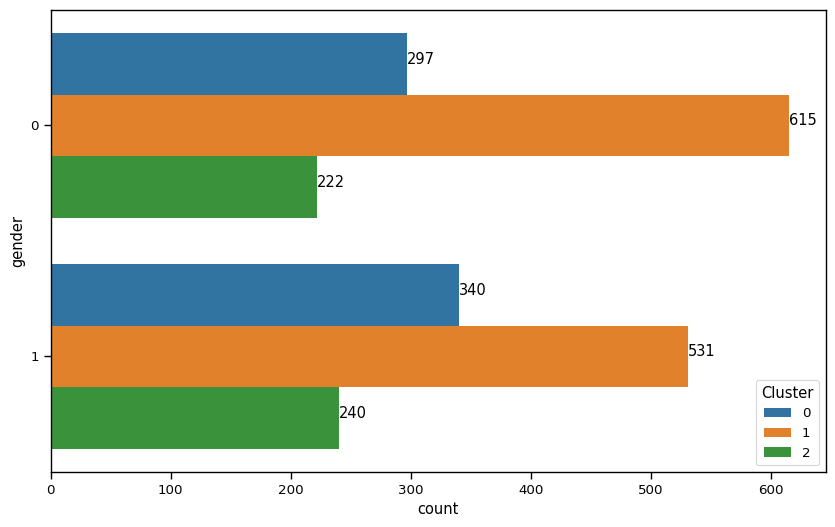

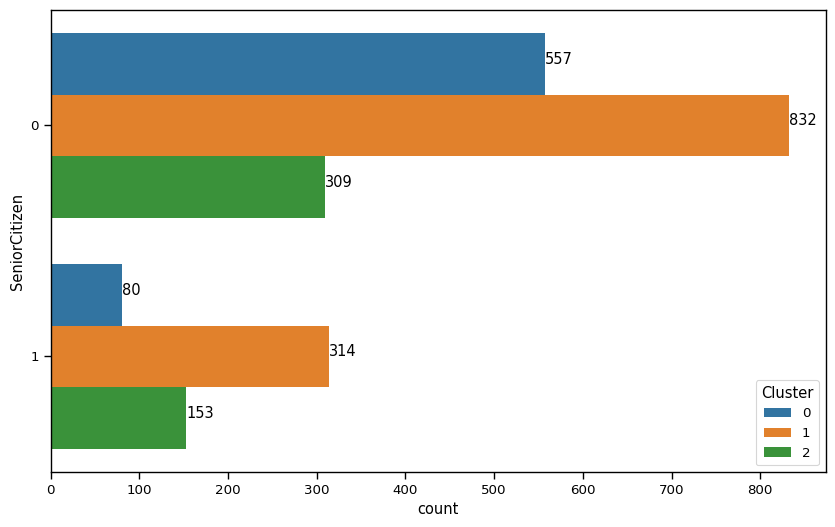

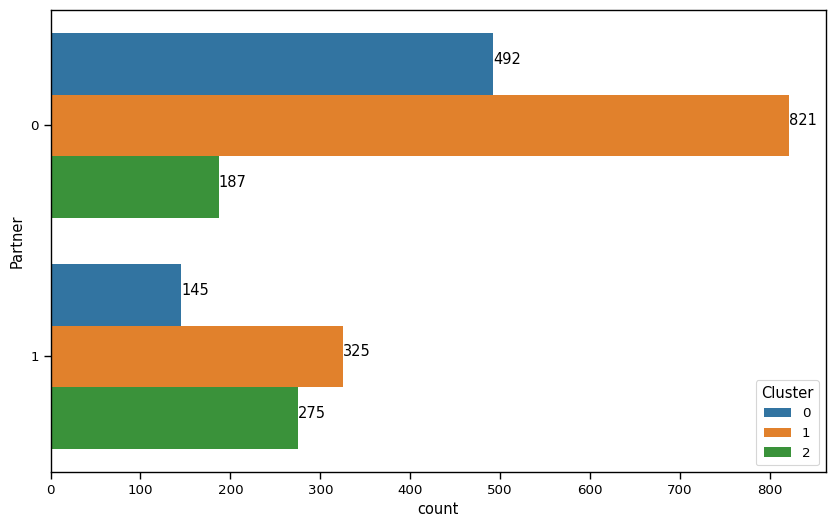

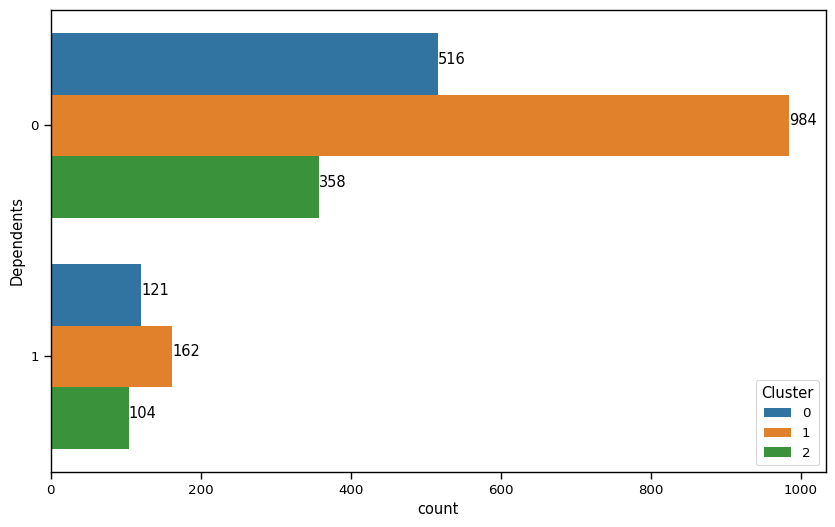

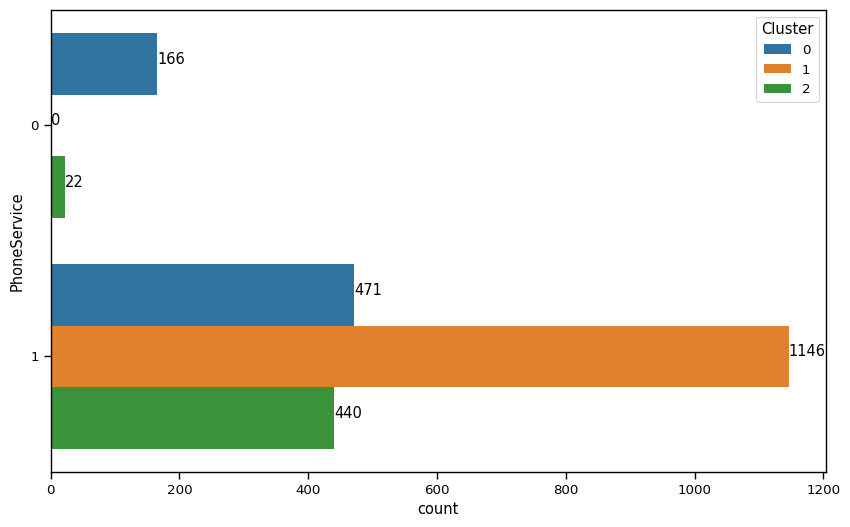

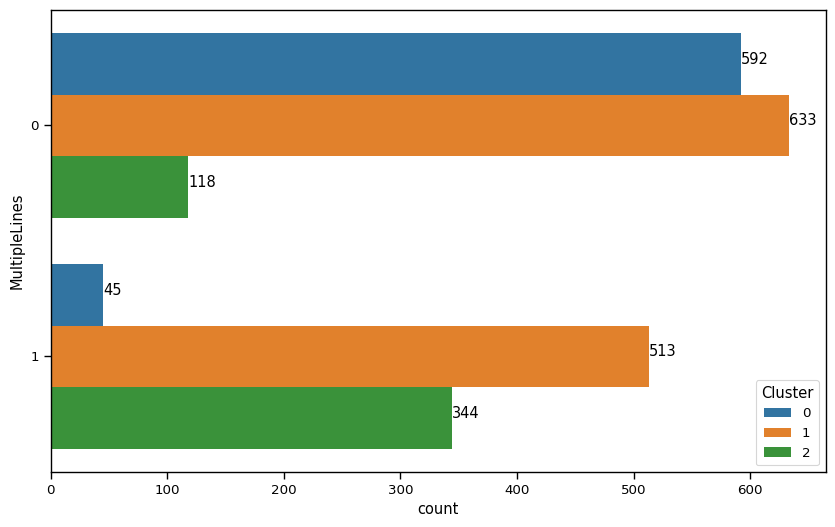

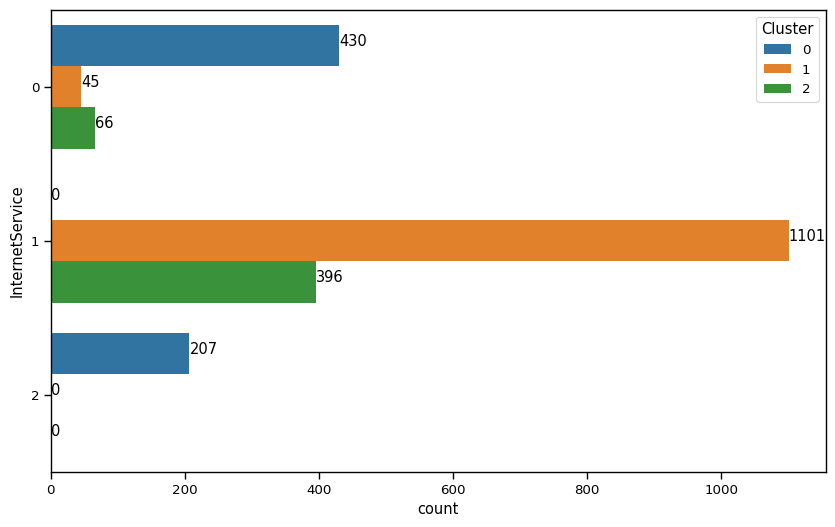

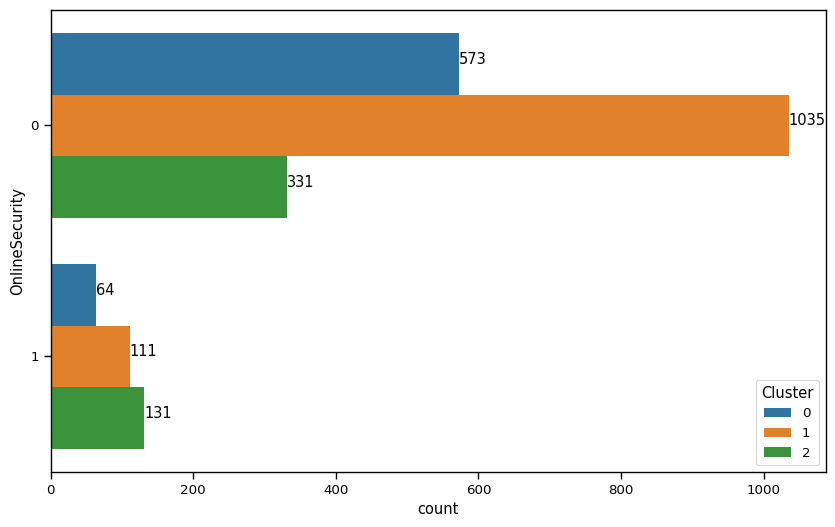

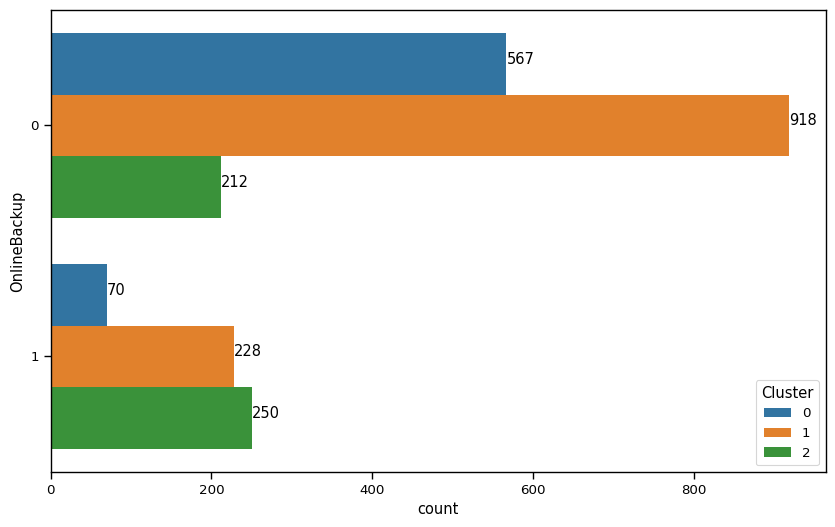

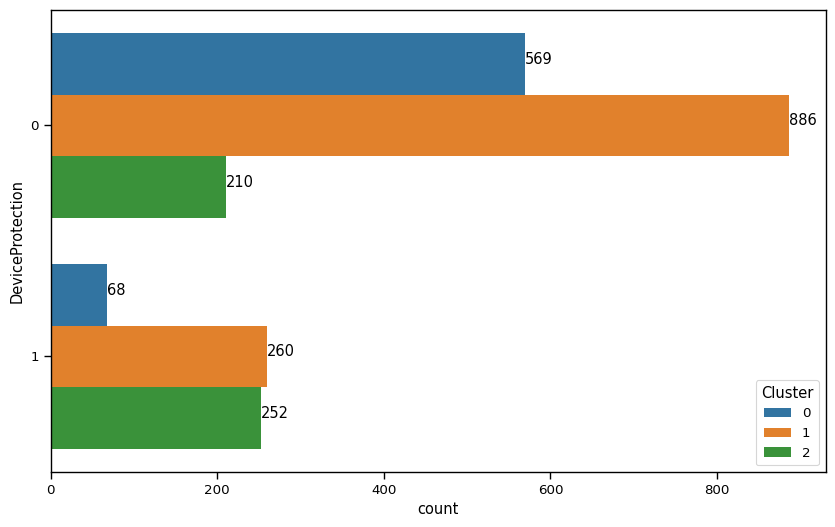

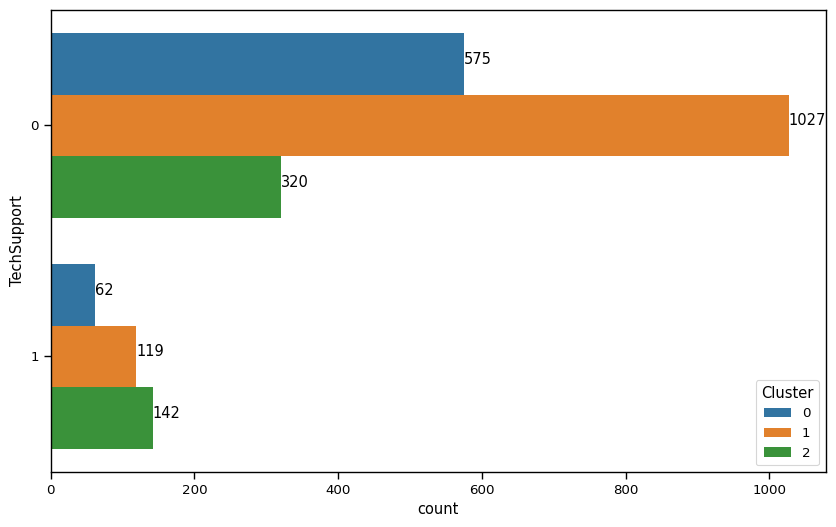

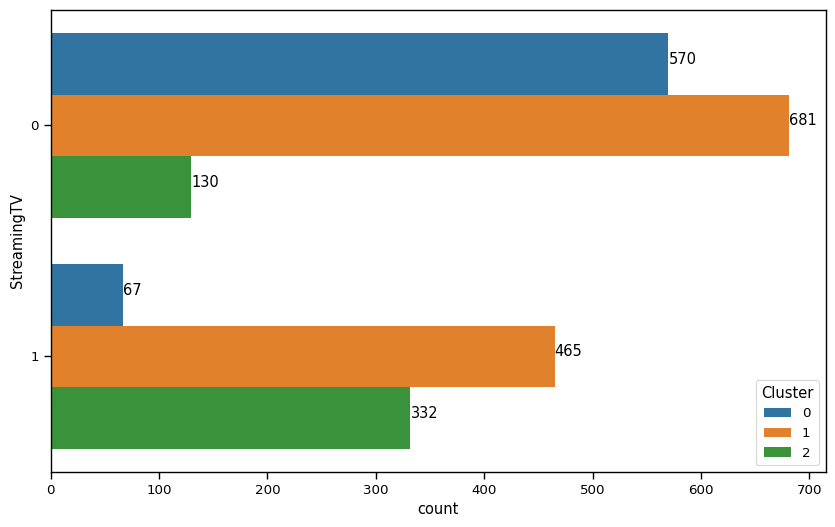

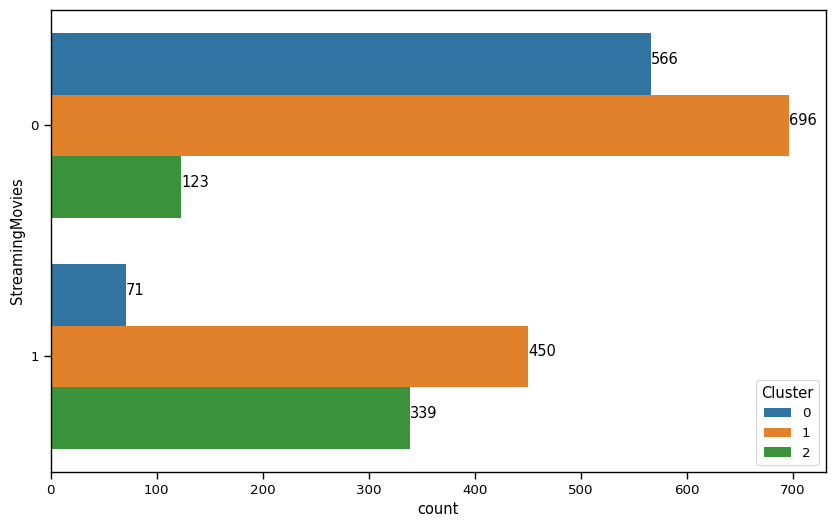

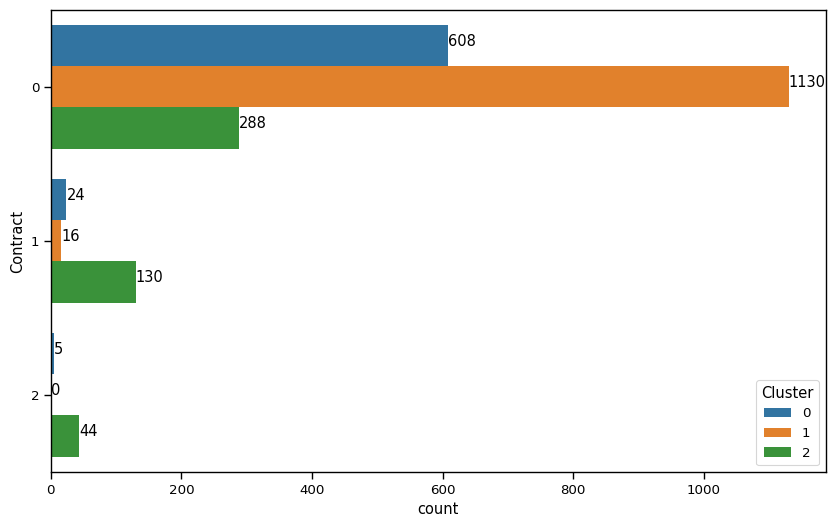

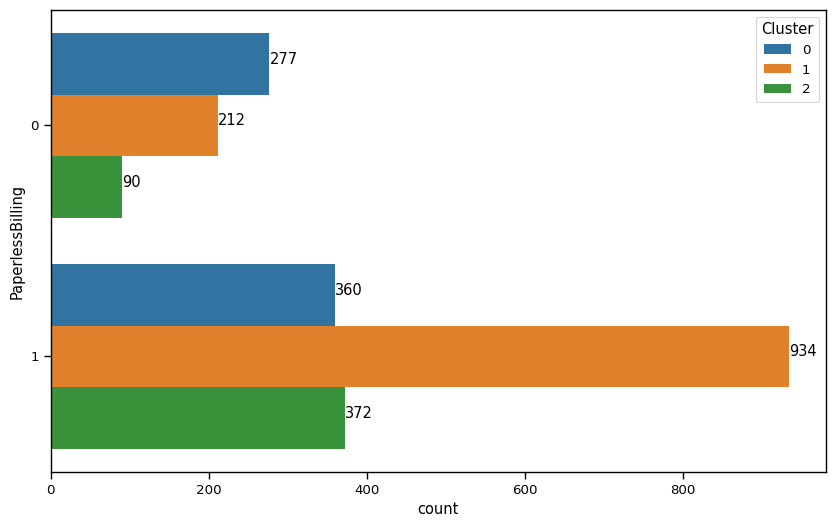

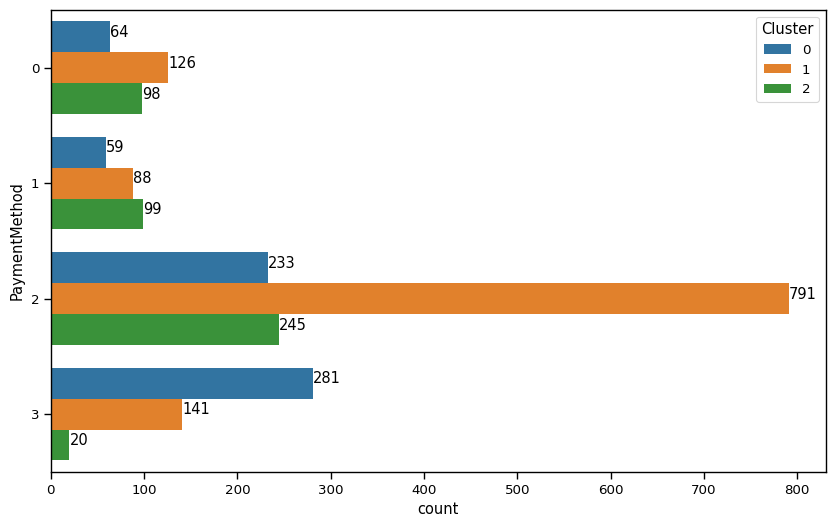

In [ ]:
countplot_Cluster(columns)

### 6.3.2 Insigh Each Cluster

In [ ]:
## Call data frame for each cluster
df_c0 = df_cluster[df_cluster.Cluster==0]
df_c1 = df_cluster[df_cluster.Cluster==1]
df_c2 = df_cluster[df_cluster.Cluster==2]

#### 6.3.2.1 With cluster = 1

In [ ]:
def countplot_C1(features):
  for feature in features:
        plt.figure(figsize=(10, 6))
        ax=sns.countplot( y= df_c1[feature],data=df_c1)
        for p in ax.patches:
            count = p.get_width()
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(round(count), (x, y)) 
  plt.show()

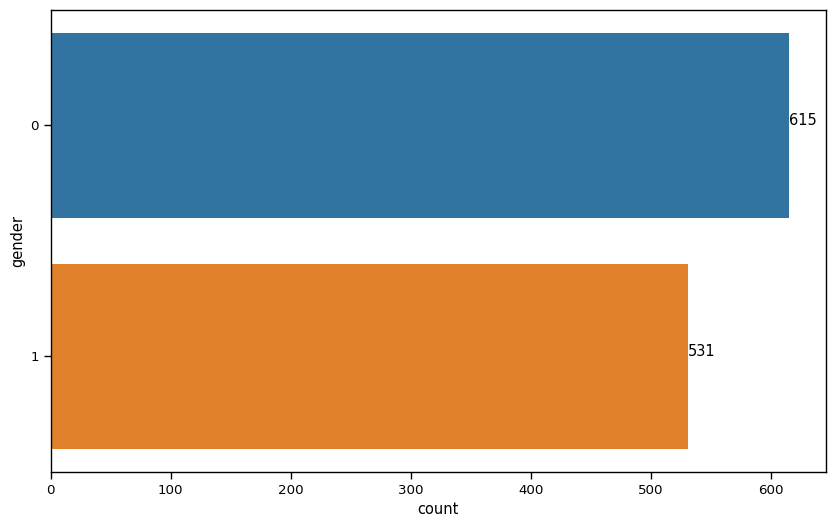

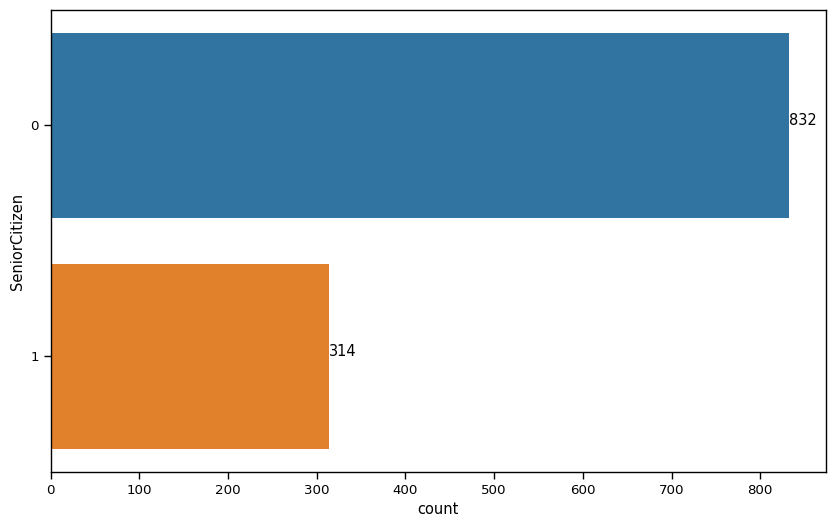

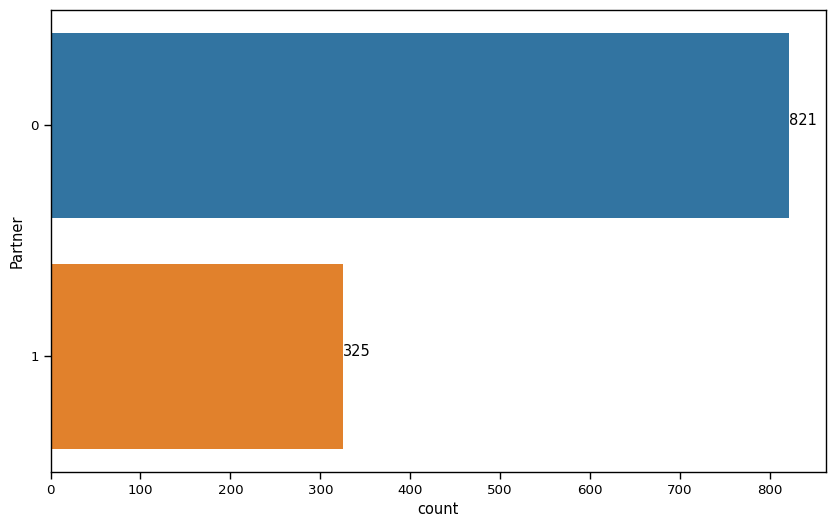

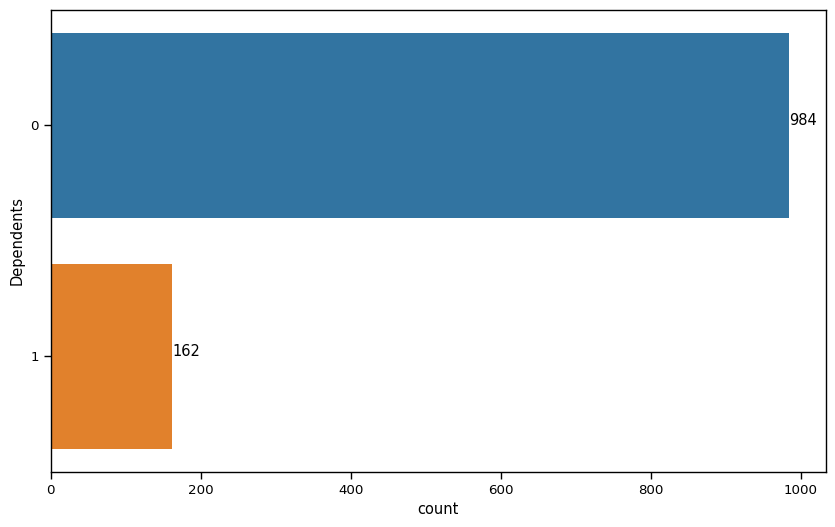

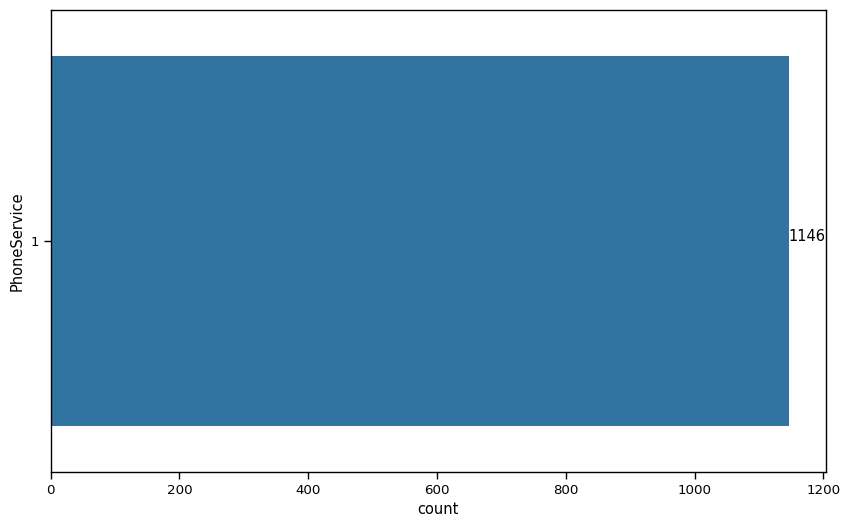

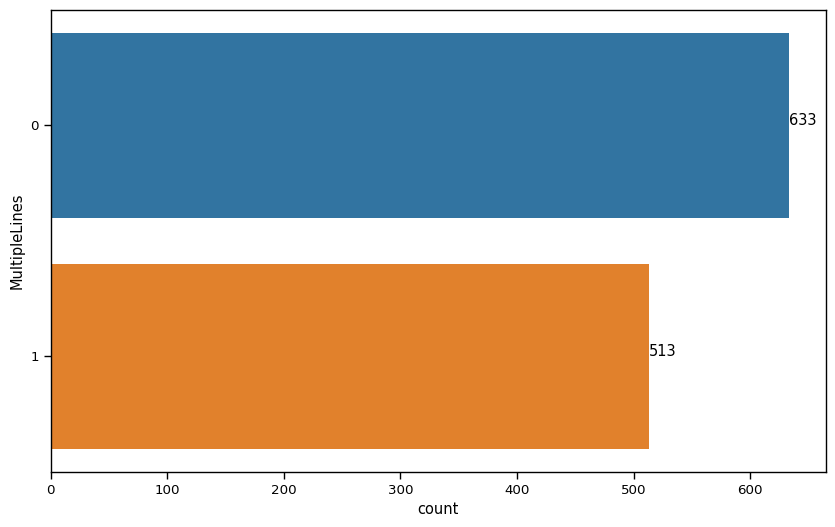

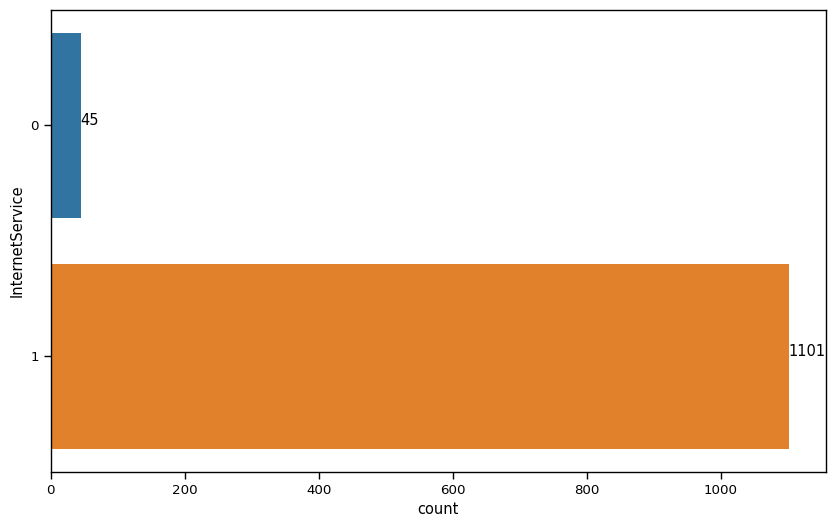

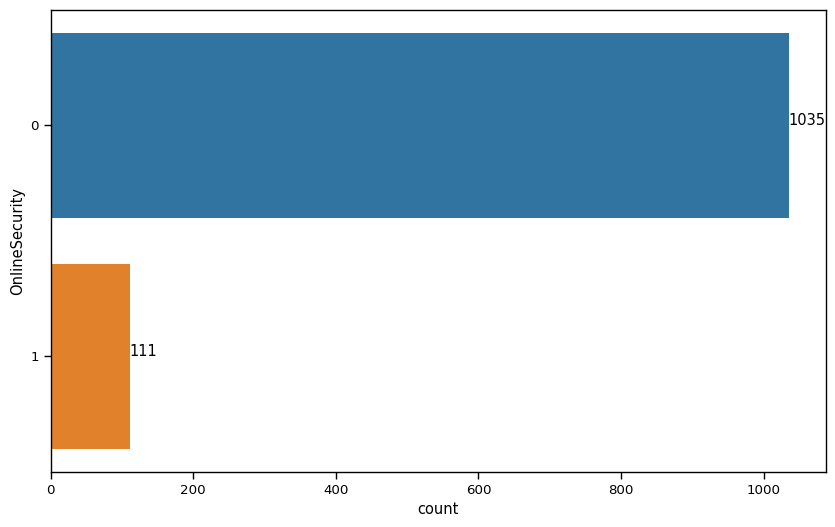

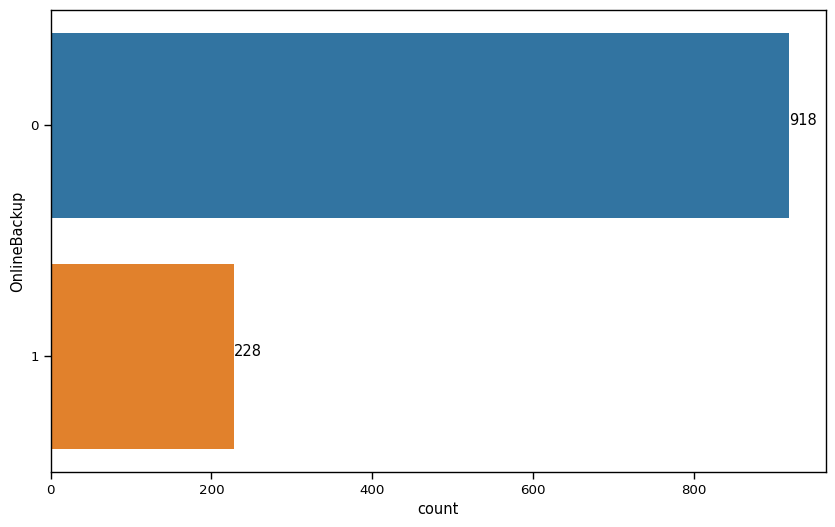

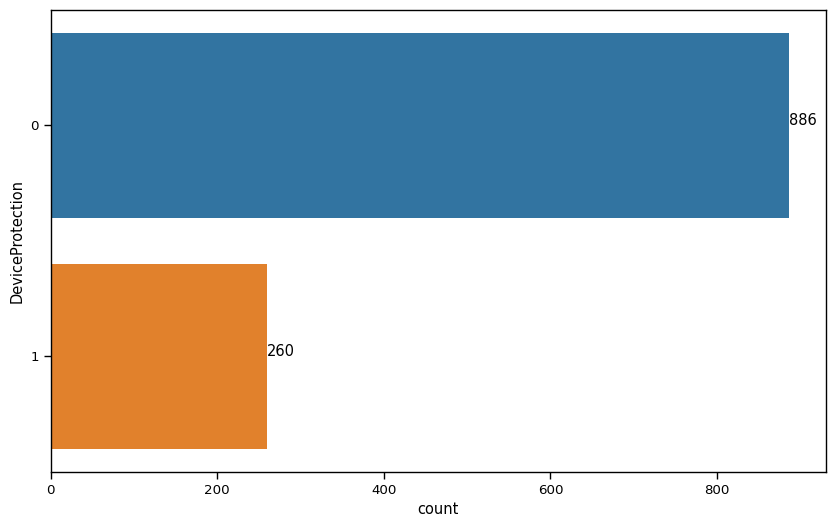

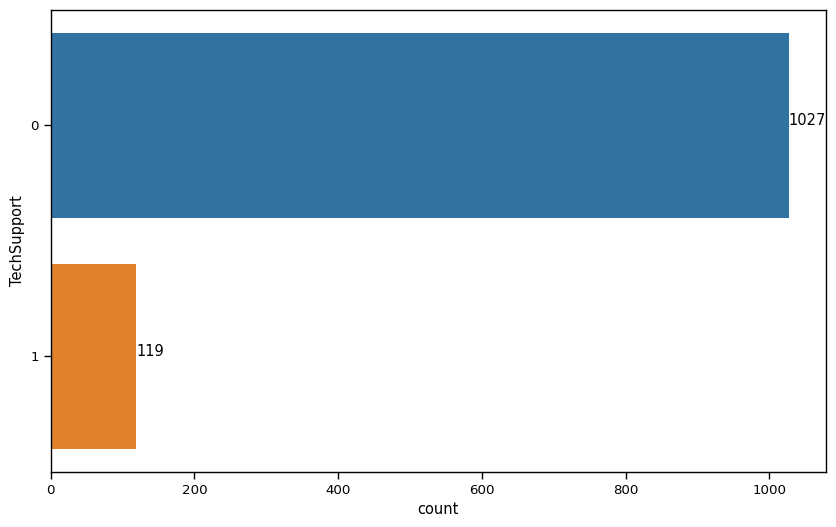

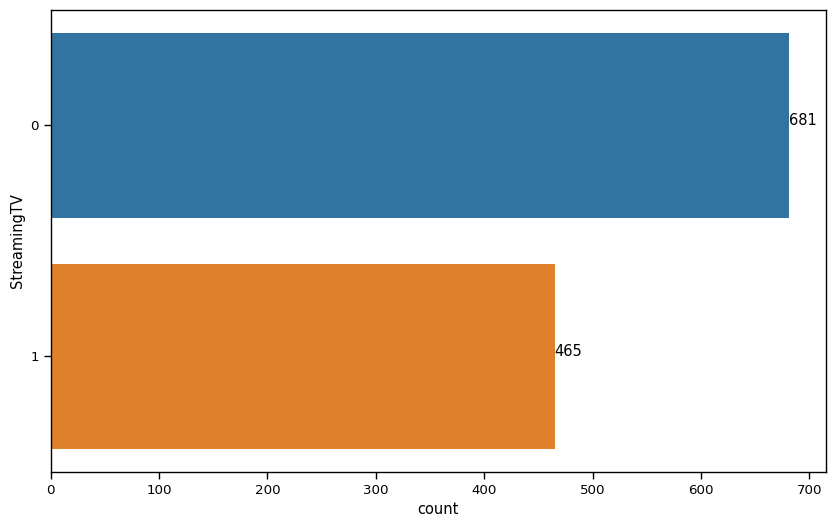

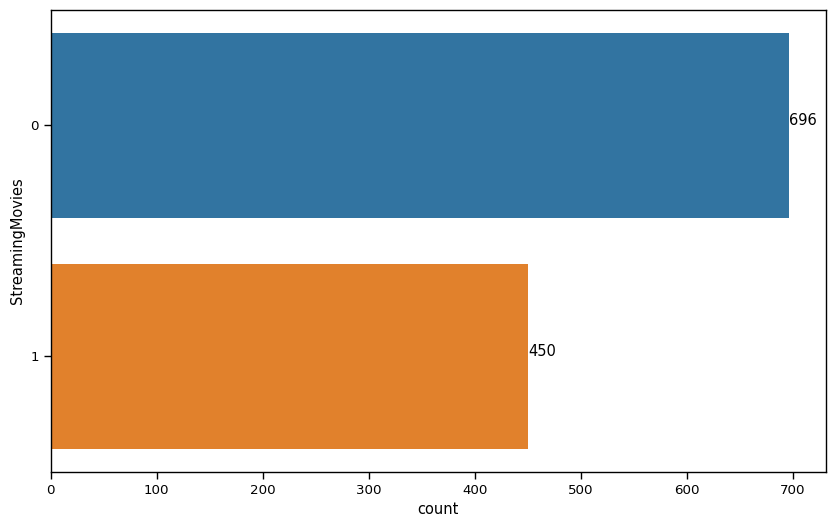

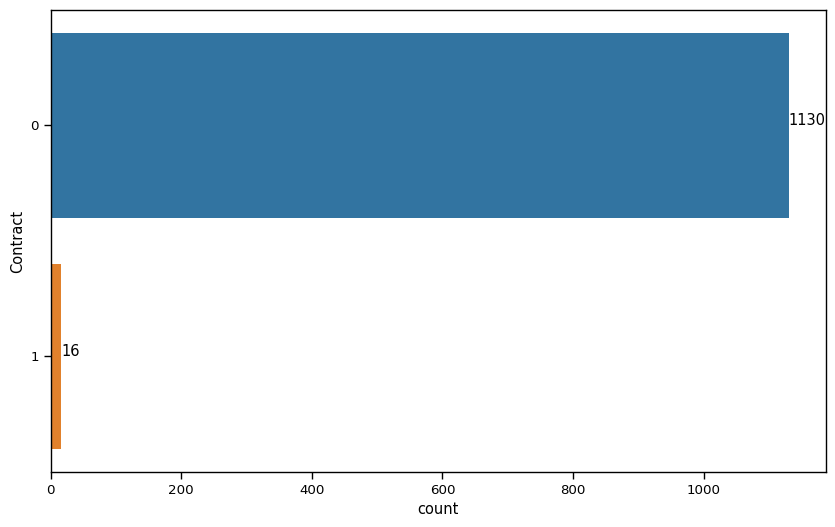

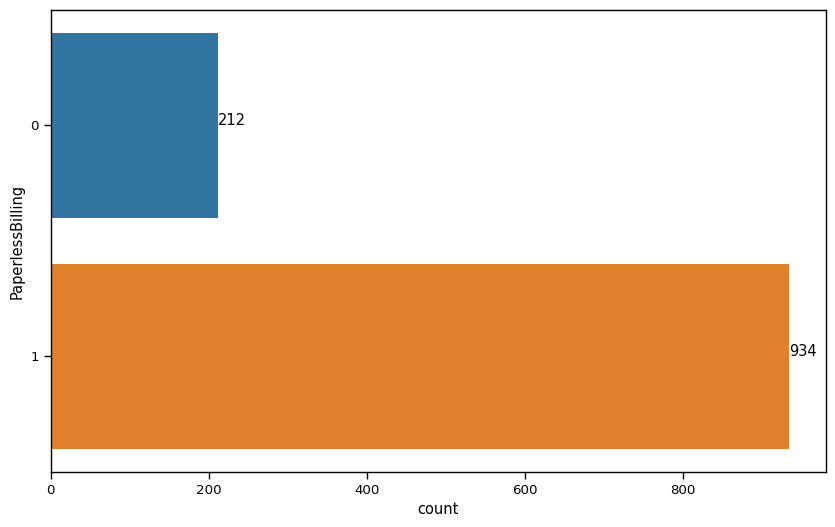

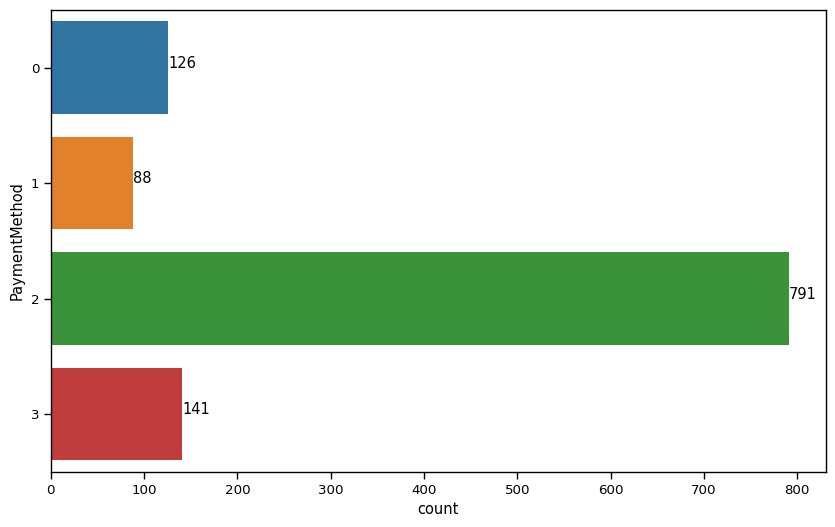

In [ ]:
countplot_C1(columns)

#### 6.3.2.2 With cluster = 2

In [ ]:
def countplot_C2(features):
  for feature in features:
        plt.figure(figsize=(10, 6))
        ax=sns.countplot( y= df_c2[feature],data=df_c2)
        for p in ax.patches:
            count = p.get_width()
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(round(count), (x, y)) 
  plt.show()

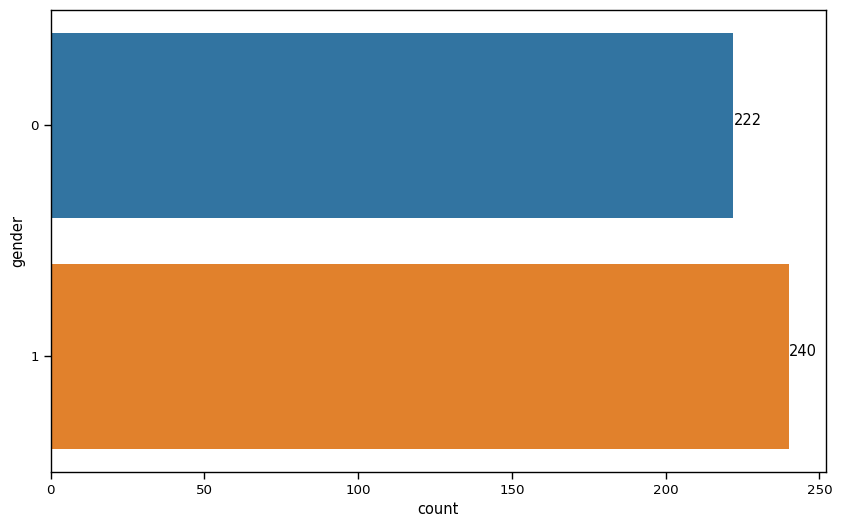

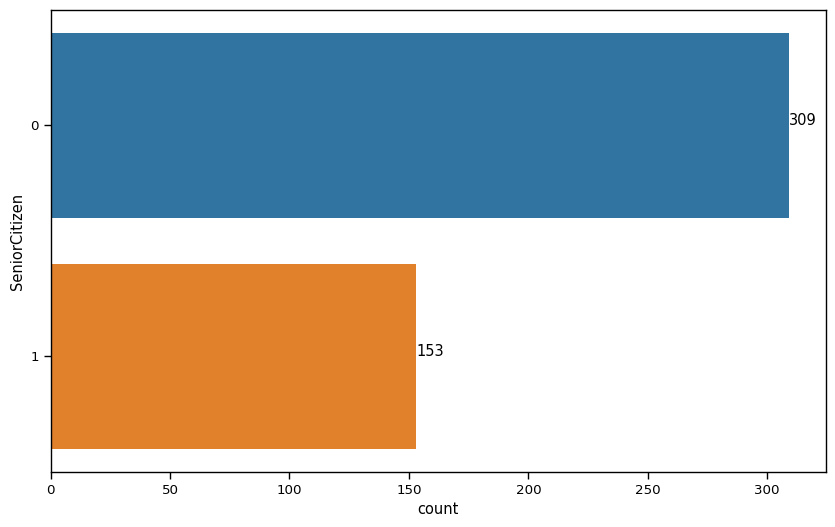

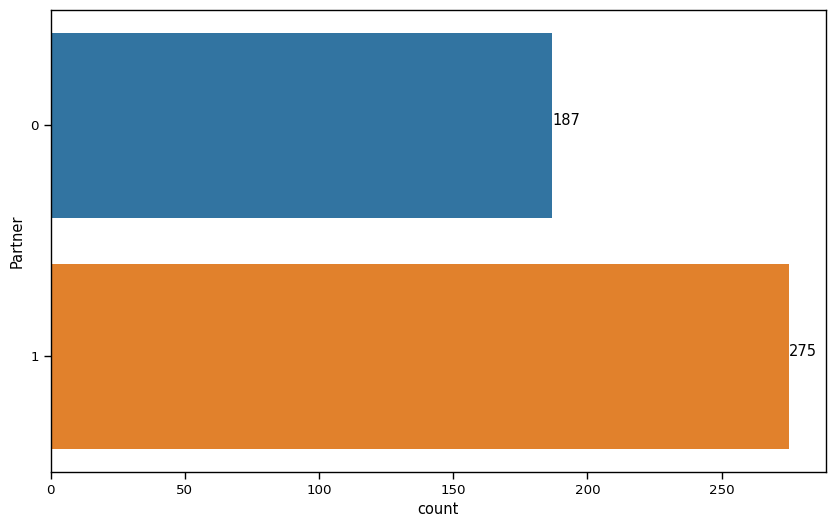

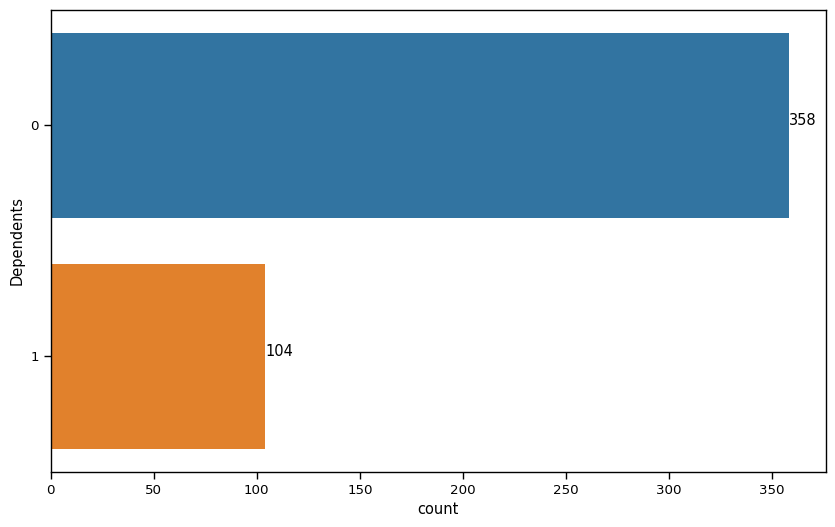

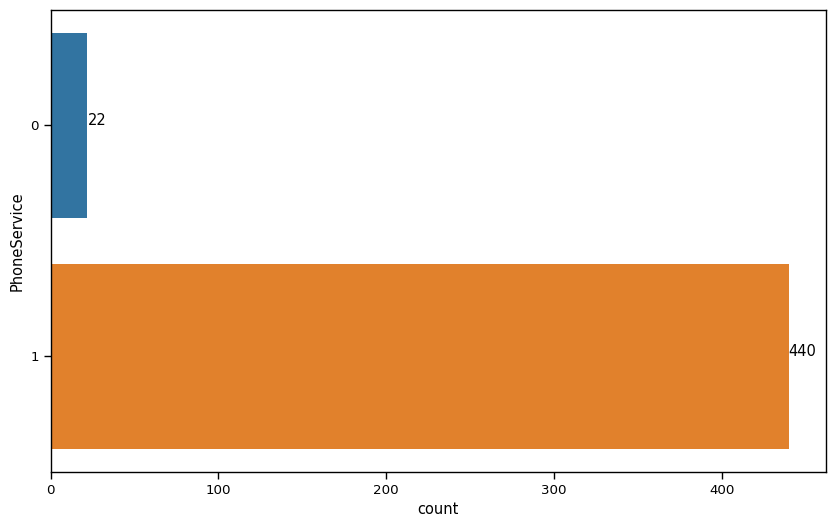

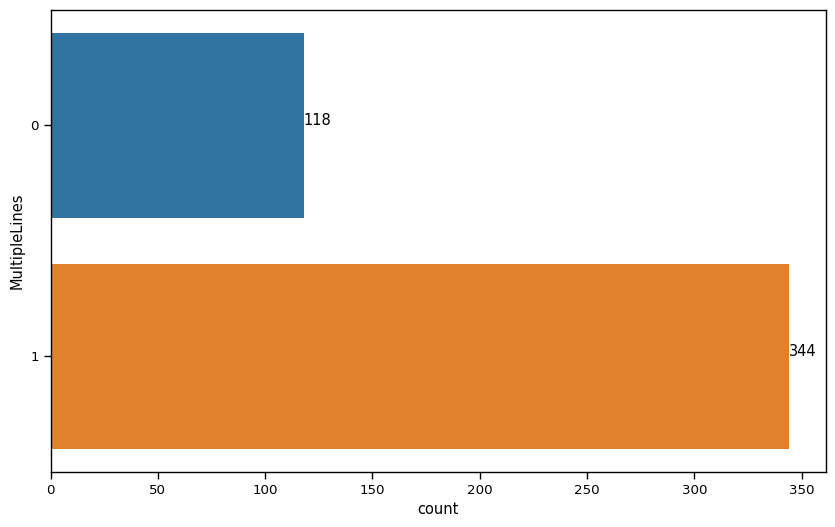

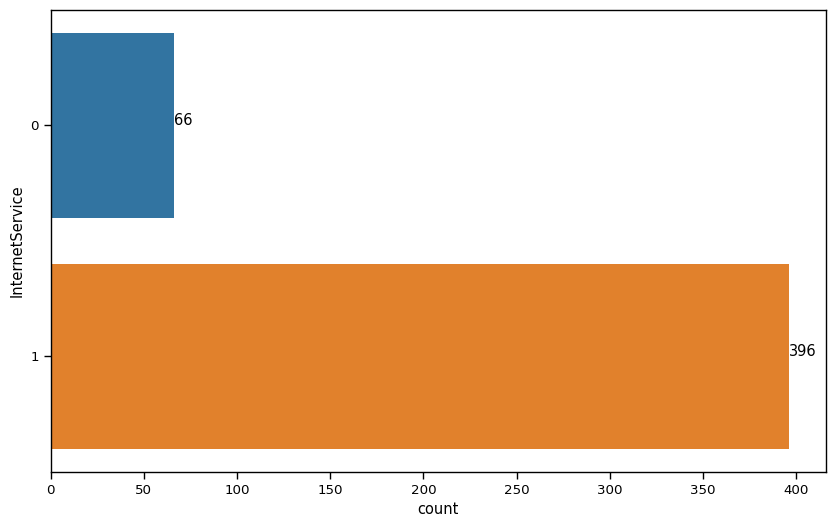

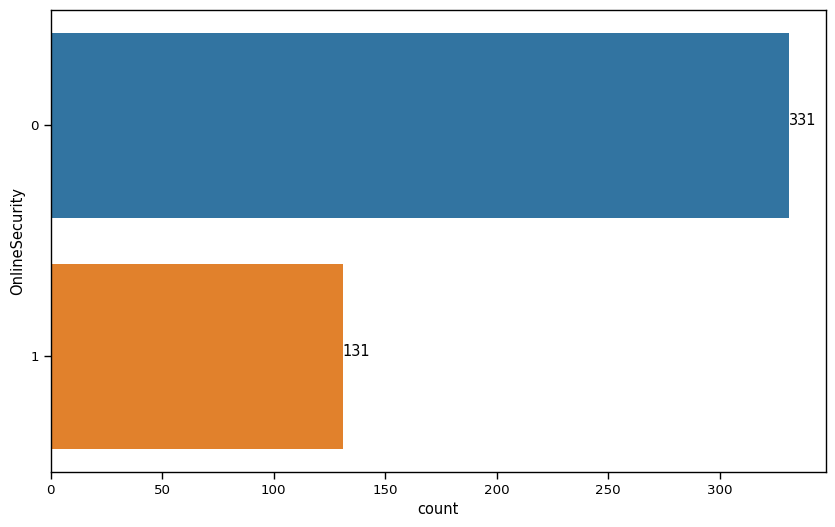

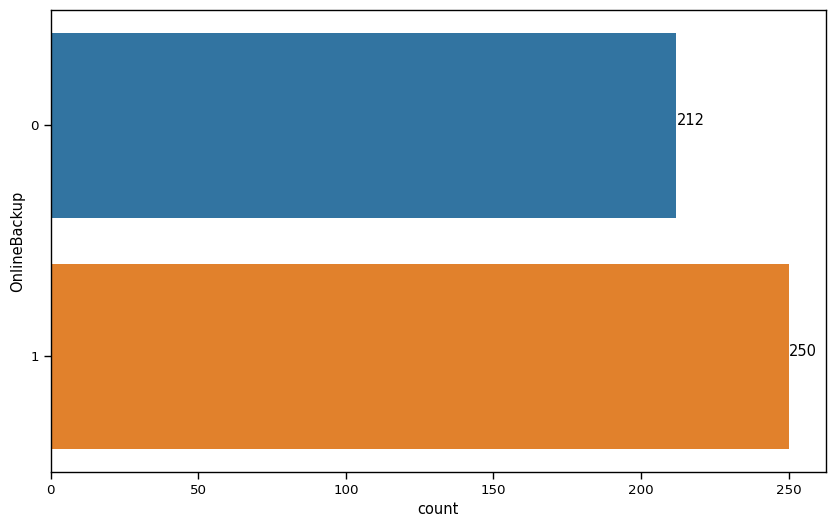

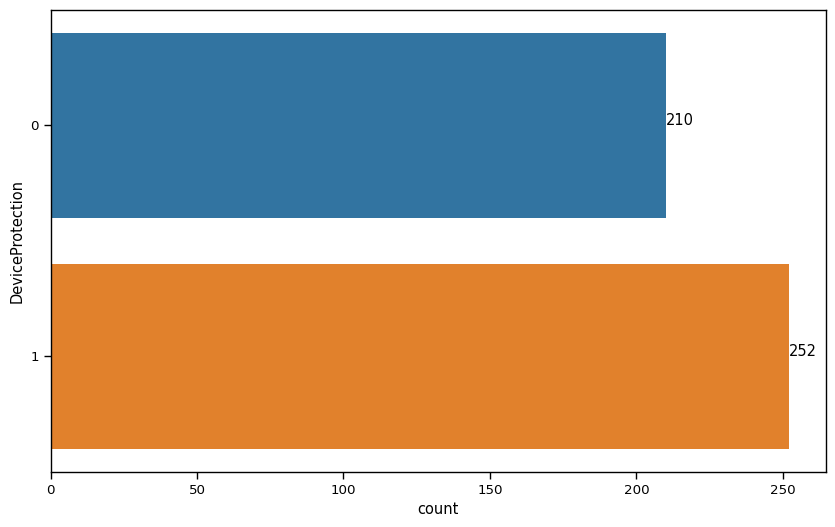

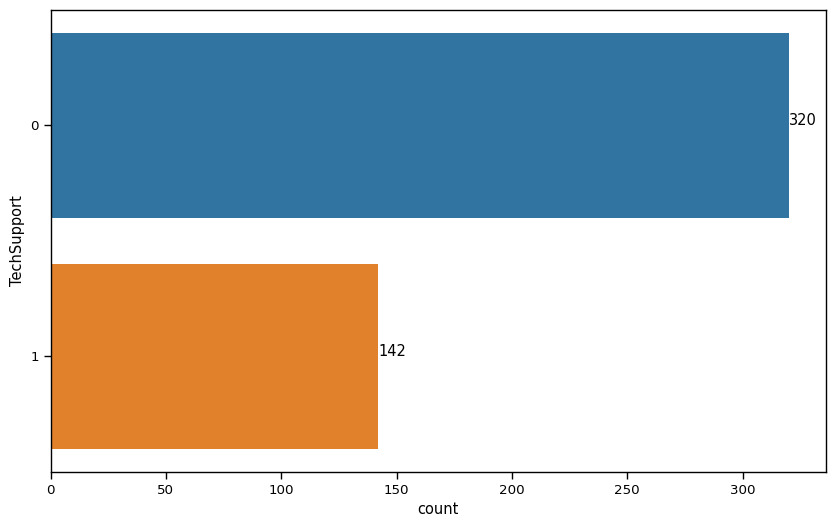

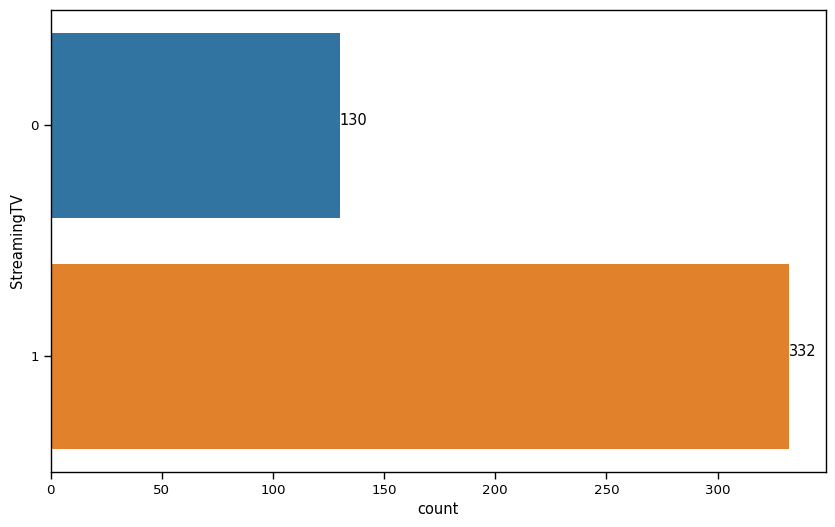

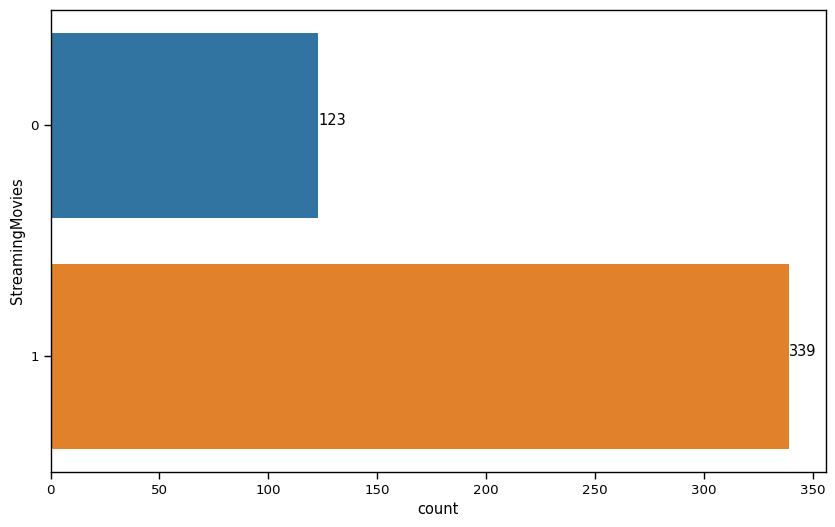

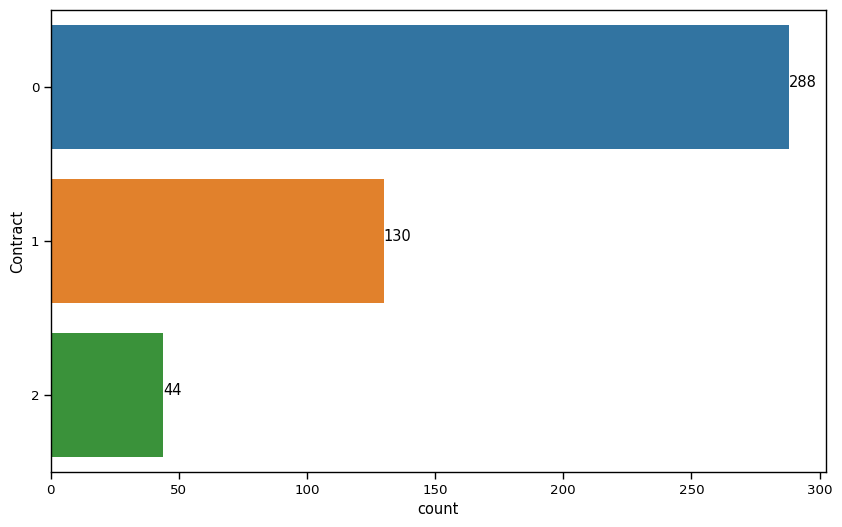

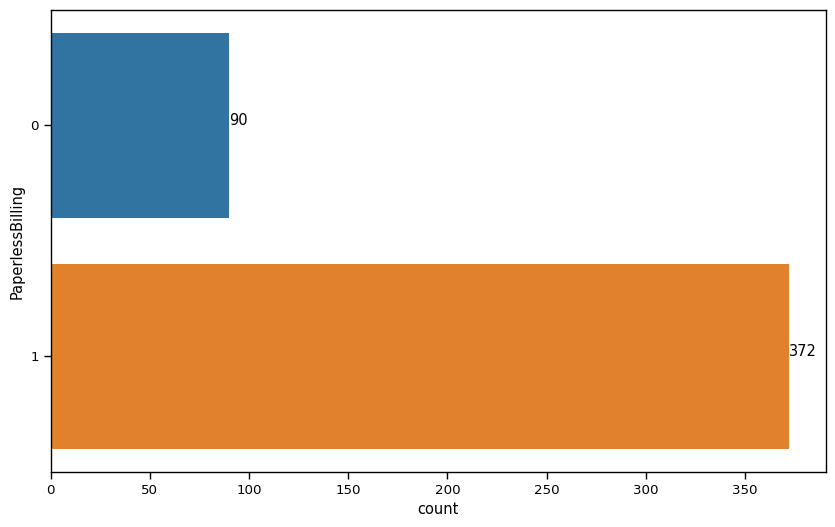

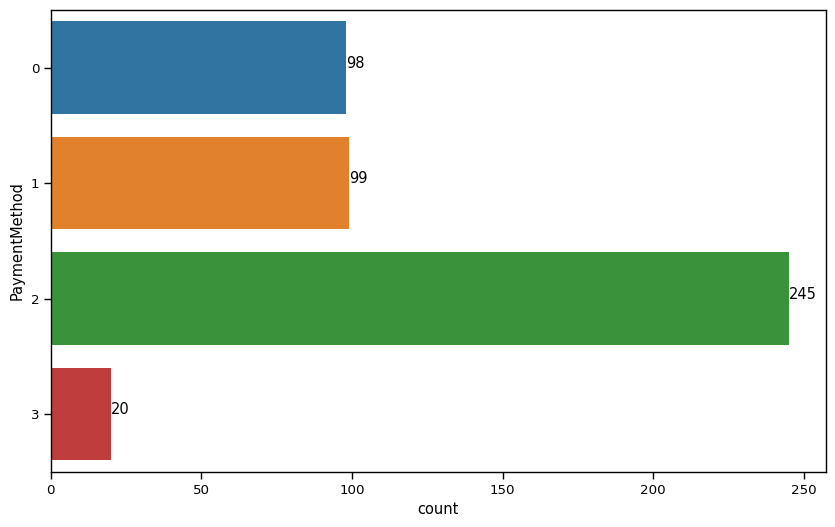

In [ ]:
countplot_C2(columns)

#### 6.3.2.2 With cluster = 0

In [ ]:
def countplot_C0(features):
  for feature in features:
        plt.figure(figsize=(10, 6))
        ax=sns.countplot( y= df_c0[feature],data=df_c0)
        for p in ax.patches:
            count = p.get_width()
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(round(count), (x, y)) 
  plt.show()

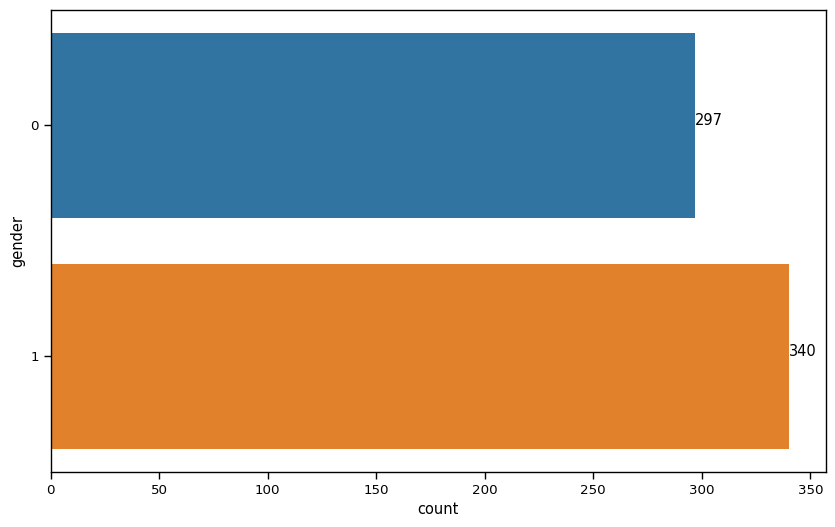

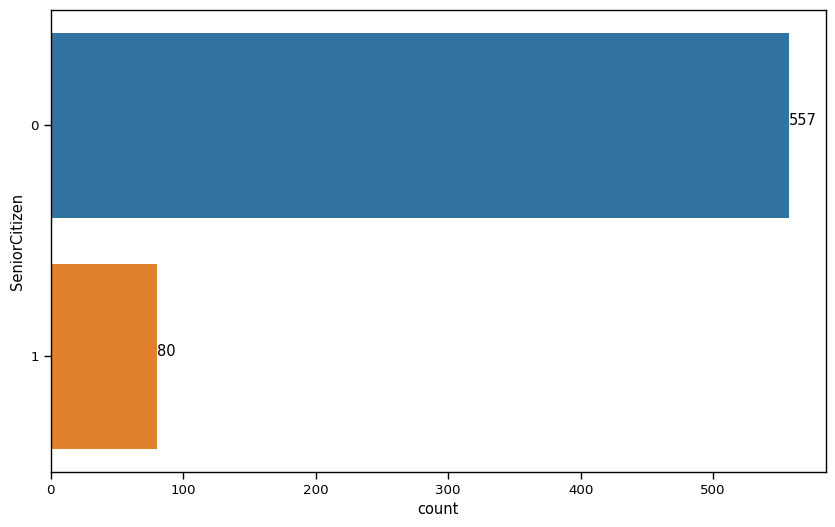

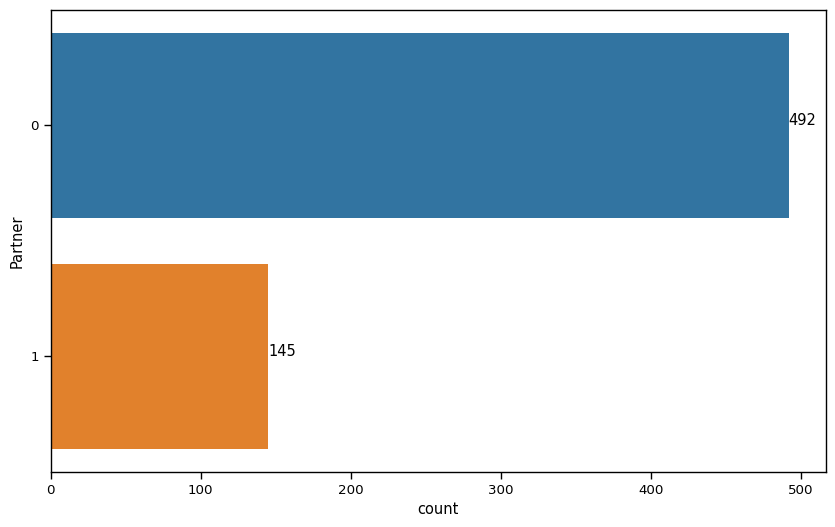

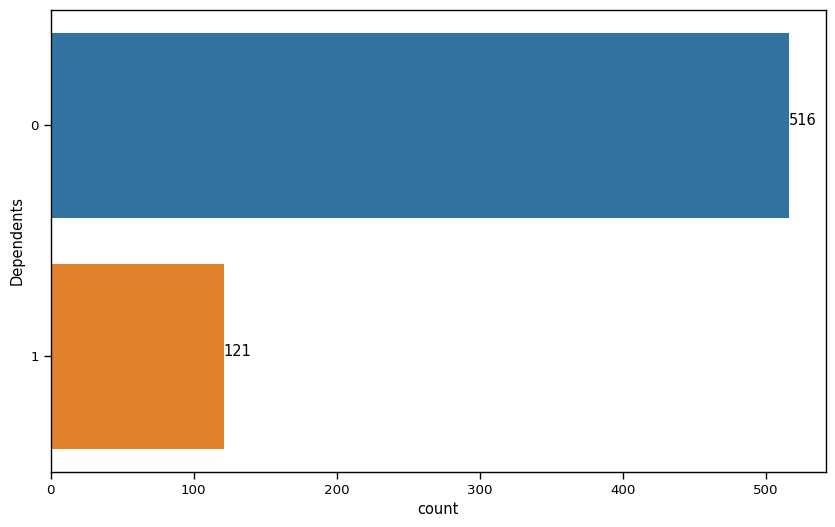

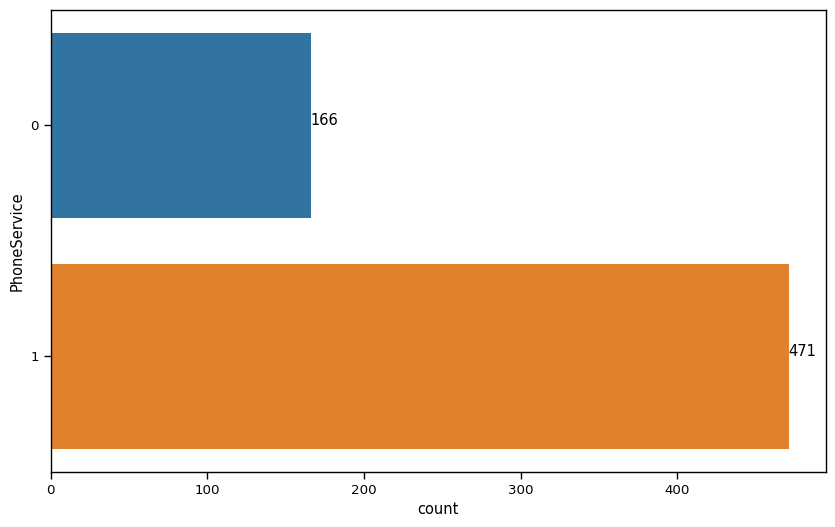

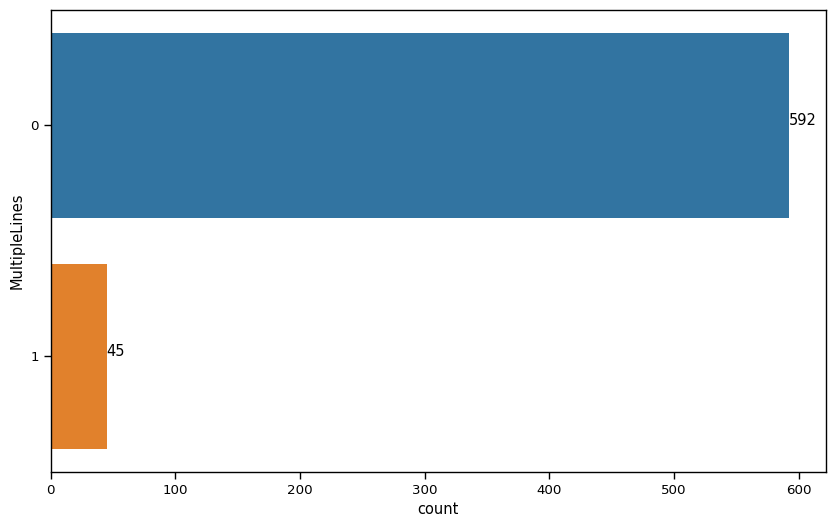

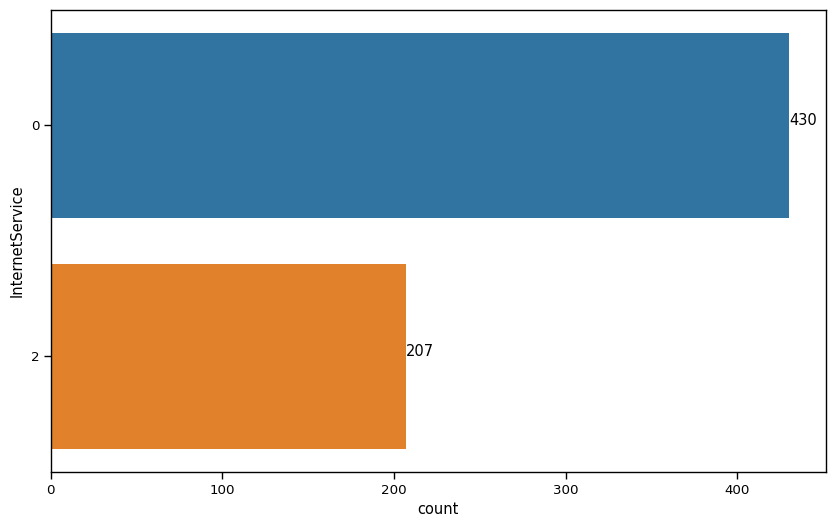

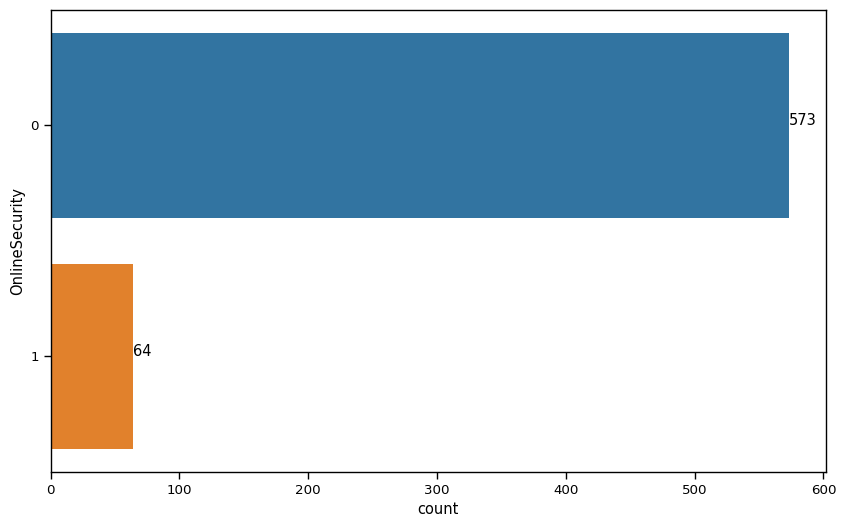

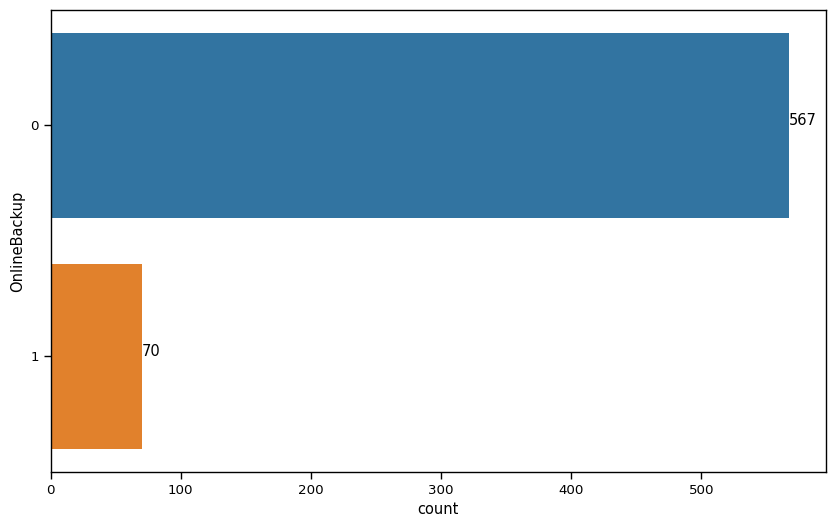

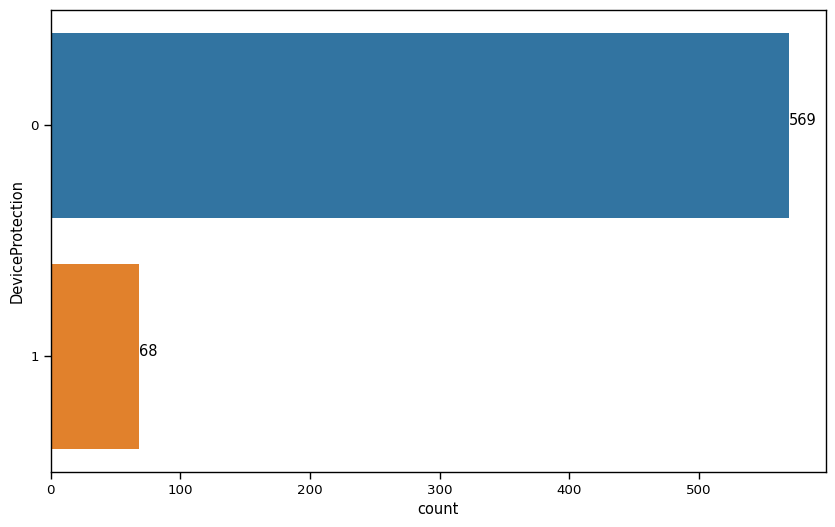

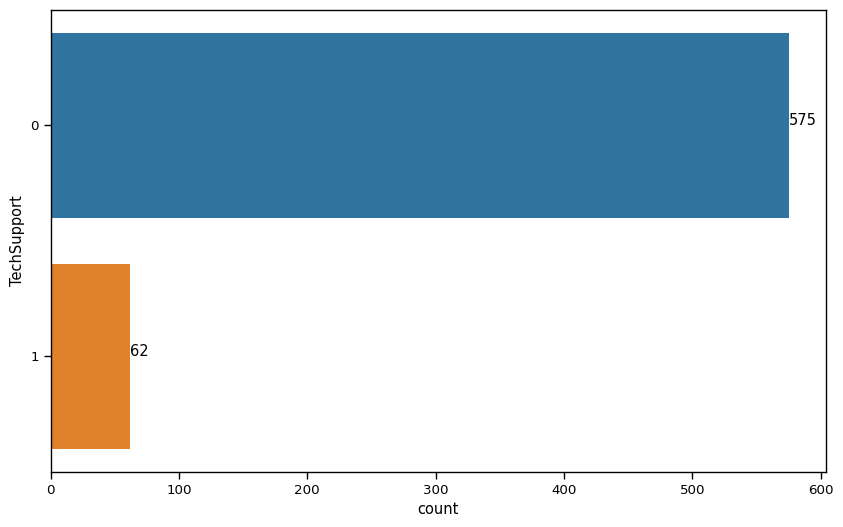

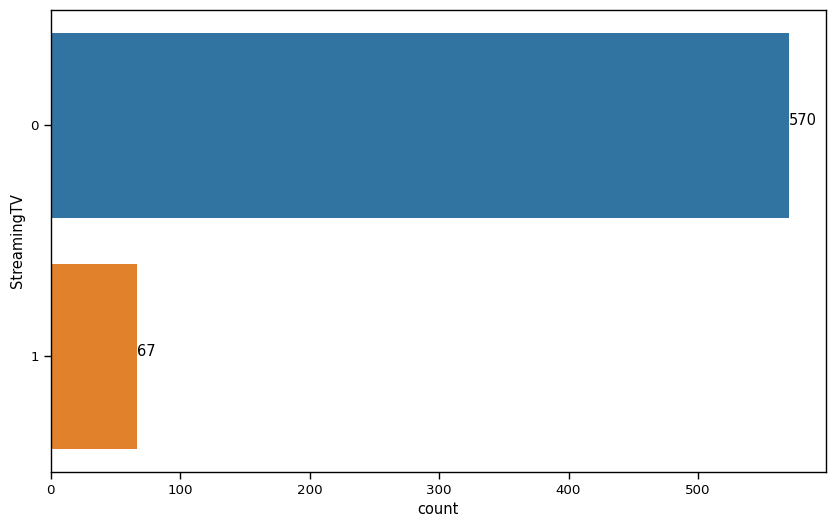

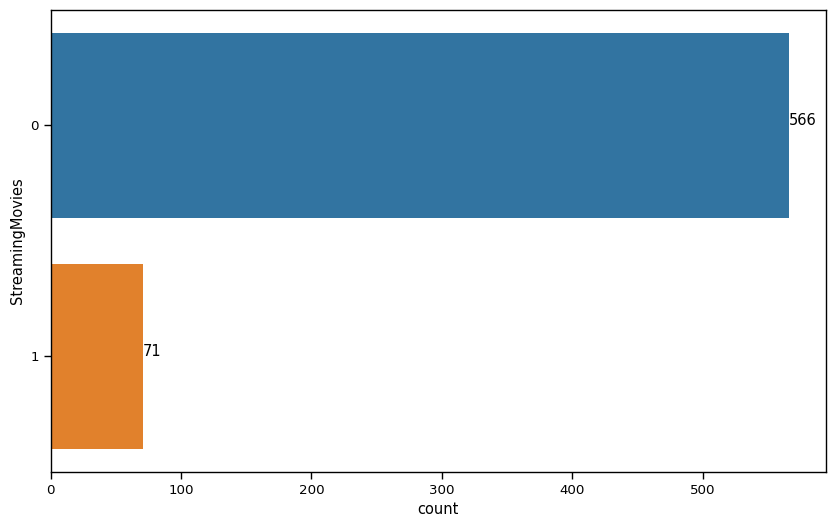

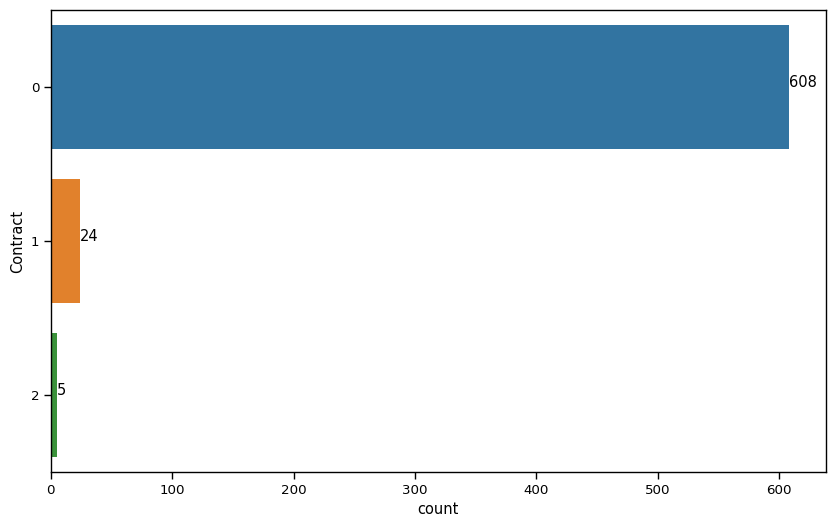

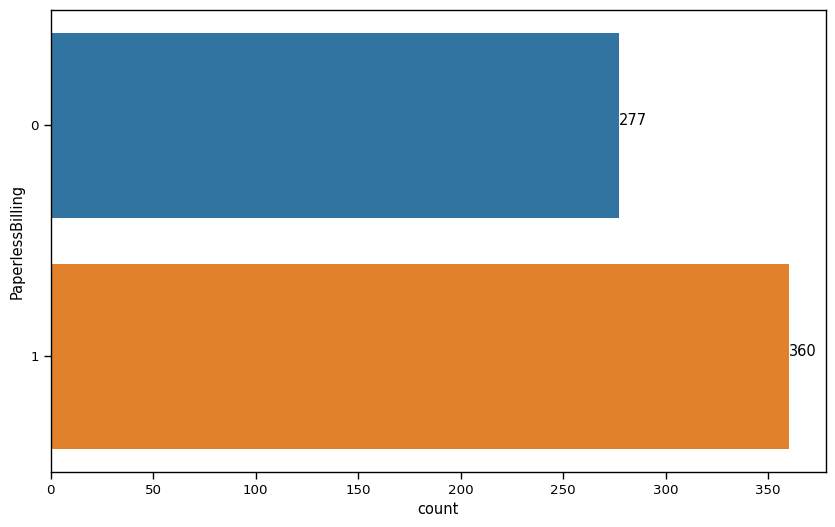

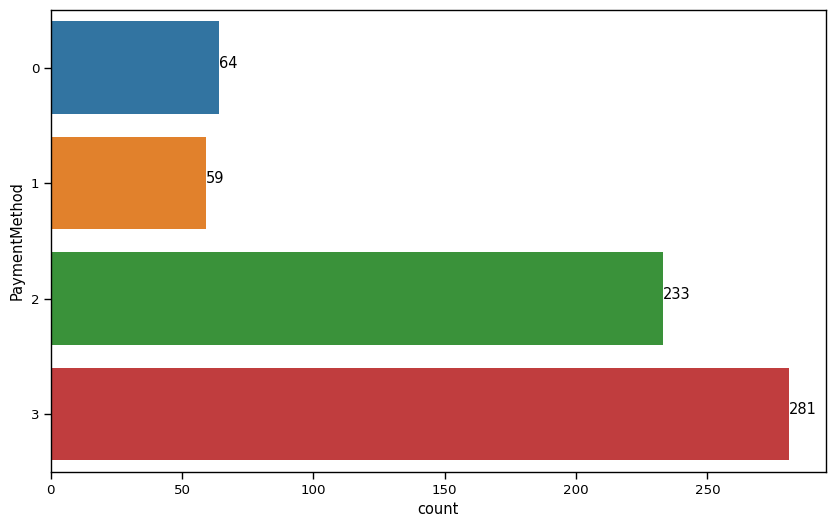

In [ ]:
countplot_C0(columns)

# **7. Processing model for prediction**

**Task cần làm để dự đoán**
1. Df2 là dữ liệu đã được mã hóa và chuẩn hóa, nên trong bài toán này sử dụng luôn df2 để tiến hành dự đoán
2. Cần Balance lại data
3. các Mô hình sẽ dược áp dụng là:
+ Logistic Regression
+ Decision Tree and Random Forrest
+ Các thuật toán Boosting

## 7.1 Choose feature

### 7.1.1feature correlation


<Axes: >

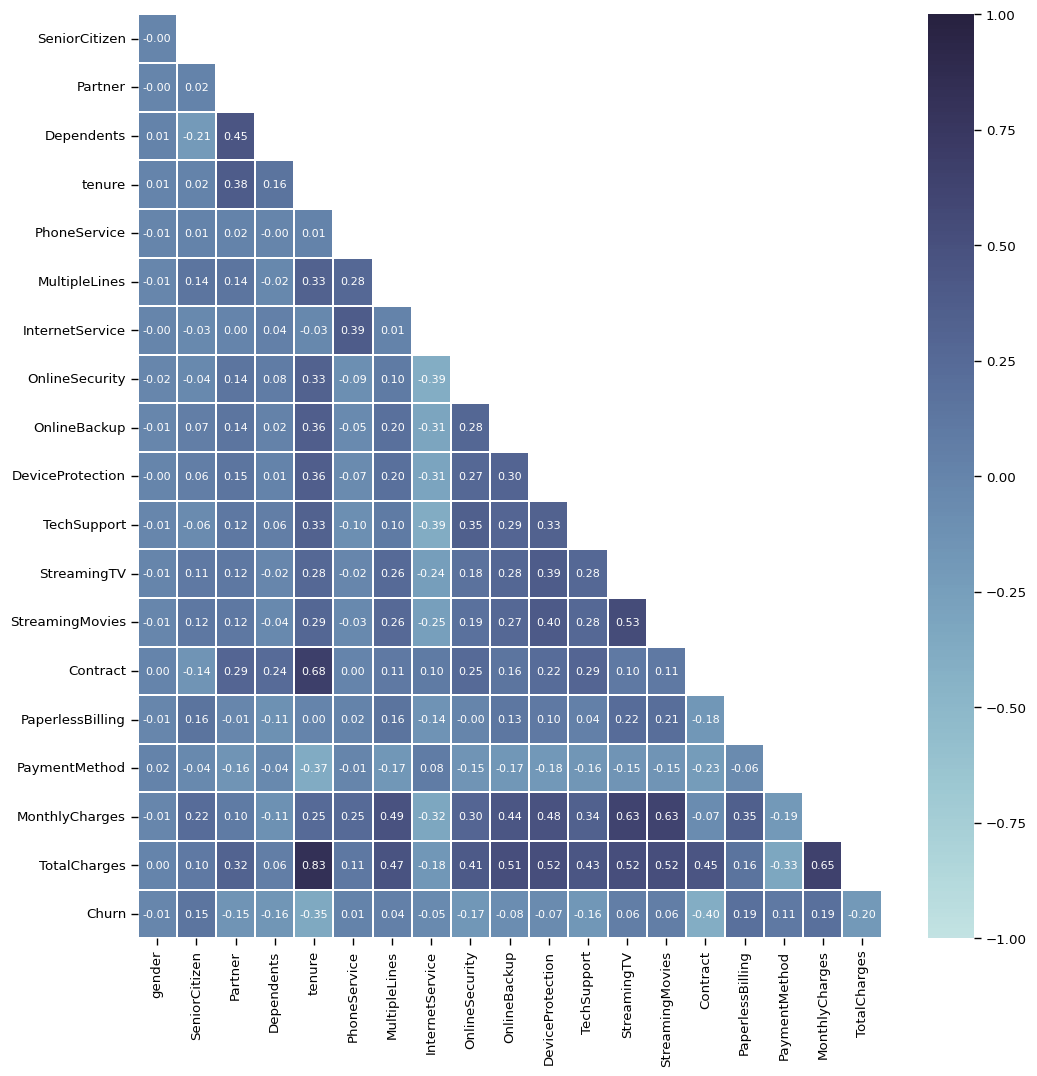

In [ ]:
## Visualization correlation
df2_cor = df2.corr()
mask = np.triu(np.ones_like(df2_cor))
adjusted_cor = df2_cor.iloc[1:,:-1]
adjusted_mask = mask[1:,:-1]
plt.figure(figsize=(12,12))
sns.heatmap(adjusted_cor,annot=True,cmap = sns.color_palette("ch:start=.2,rot=-.3", 
                                                             as_cmap=True),mask = adjusted_mask,
            annot_kws ={'fontsize':8}, fmt ='.2f', 
            vmin= -1, vmax = 1, 
            linecolor ='white', 
            linewidths = 0.1)

-> Xóa các feature có tương quan không rõ ràng với churn (-0.1,0.1) là: "gender, "phone service", "multipleLines",
,"Internet-service", "Onlinebackup","deviceProtection", "streamingTv" vaf "Streamingmovies"


### 7.1.2 Choose X and Y

In [ ]:
## divide y and x
y = df2['Churn']
x= df2.drop(['Churn','PhoneService','gender','InternetService','MultipleLines',"OnlineBackup","DeviceProtection","StreamingTV","StreamingMovies"], axis = 1)

### 7.1.3 Balance Data

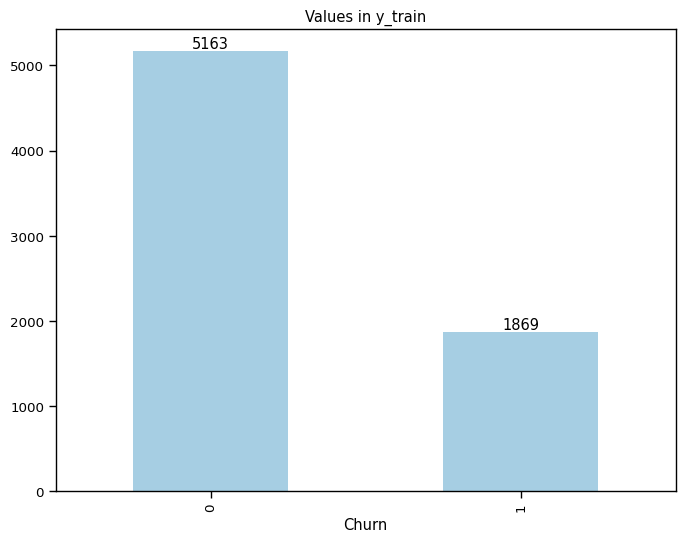

In [ ]:
## Visualize data in y_train
count = y.value_counts()
plt.figure(figsize=(8, 6))
count.plot(kind='bar', colormap='Paired')
plt.xlabel('Churn')
plt.title('Values in y_train')
# adding labels
for i, v in enumerate(count):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

-> data đang bị mất cân bằng

In [ ]:
## use SMOTE for balance Data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42,sampling_strategy = 1)
x_train_smo, y_train_smo = smote.fit_resample(x, y)

In [ ]:
## get_dummies feature
x = pd.get_dummies(x, columns = ['Partner', 'Dependents',
               'OnlineSecurity', 'TechSupport', 
                'Contract','PaperlessBilling', 'PaymentMethod'], drop_first=True)

In [ ]:
## Divide train, test, validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train_smo,y_train_smo, test_size = 0.2, random_state = 4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (8260, 11) (8260,)
Test set: (2066, 11) (2066,)


In [ ]:
y_train.value_counts()

1    4141
0    4119
Name: Churn, dtype: int64

## 7.2. Prepara model

### 7.2.1 Logistic Regression

In [ ]:
## Call parameter for Lr
lr = LogisticRegression()
param_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 20],
    'solver': [ 'liblinear',  'saga'],
}

In [ ]:
## find best parameter for lr
## Best hyperparameters:  {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
## grid_lr =GridSearchCV(lr, param_lr, cv=5, scoring='accuracy')
## grid_lr.fit(x_train, y_train)
## print("Best hyperparameters: ", grid_lr.best_params_)

Best hyperparameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}

In [ ]:
churn_lr = LogisticRegression(C = 0.1,  penalty='l2', solver = 'saga')
y_pred_lr= churn_lr.fit(x_train,y_train).predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76      1044
           1       0.75      0.81      0.78      1022

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066



### 7.2.2 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

In [ ]:
## Call parameter for dt
dt = DecisionTreeClassifier()
param_dt = {
    'criterion': ['gini', 'entropy'],  # Phương pháp đánh giá
    'max_depth': [None, 2, 4, 6, 8, 10], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 3]  
}

In [ ]:
## grid_dt = GridSearchCV(dt, param_dt, cv=5, scoring='accuracy')
## grid_dt.fit(x_train, y_train)
## print("Best hyperparameters: ", grid_dt.best_params_)


Best hyperparameters:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 2}

In [ ]:
churn_dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 6, min_samples_leaf = 3, min_samples_split = 2)
y_pred_dt = churn_dt.fit(x_train,y_train).predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77      1044
           1       0.75      0.83      0.79      1022

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066



### 7.2.3 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import RandomizedSearchCV
param_fr = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 5, 10],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['auto', 'sqrt'], 
    'bootstrap': [True, False]  
}

rf = RandomForestClassifier()

In [ ]:
## random_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_fr, n_iter=10, cv=5, random_state=42)
## random_rf.fit(x_train, y_train)
## print("Best Parameters: ", random_rf.best_params_)
## print("Best Score: ", random_rf.best_score_)

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}
Best Score:  0.813680387409201

In [ ]:
churn_rf = RandomForestClassifier(n_estimators = 100, min_samples_split = 2, min_samples_leaf = 2, max_depth = None, 
                                  max_features = 'auto', bootstrap = True)
y_pred_rf = churn_rf.fit(x_train,y_train).predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1044
           1       0.80      0.86      0.83      1022

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066



### 7.2.4 ADABOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada = AdaBoostClassifier()
param_ada = {'n_estimators': [50, 100, 150],
              'learning_rate': [0.1, 0.5, 1.0]}

In [ ]:
## random_ada = RandomizedSearchCV(ada, param_distributions=param_ada, n_iter=10, cv=5)
## random_ada.fit(x_train,y_train)
## print("Best Hyperparameters: ",  random_ada.best_params_)

Best Hyperparameters:  {'n_estimators': 150, 'learning_rate': 1.0}

In [ ]:
ada = AdaBoostClassifier(DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, min_samples_leaf = 2, min_samples_split = 10)
,n_estimators=150, learning_rate=1)
y_predict_ada = ada.fit(x_train, y_train).predict(x_test)

In [ ]:
print(classification_report(y_test, y_predict_ada))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1044
           1       0.81      0.82      0.81      1022

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066



### 7.2.5 Gardienboosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
Gra = GradientBoostingClassifier()
param_gra = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 3, 4]
}

# Perform Grid Search CV
random_gra = RandomizedSearchCV(Gra, param_distributions=param_gra, cv=5)

In [ ]:
## Fit the model on the training data
## random_gra.fit(x_train, y_train)
## print("Best Parameters: ", random_gra.best_params_)


Best Parameters:  {'n_estimators': 100, 'min_samples_split': 3, 'max_depth': 4, 'learning_rate': 0.1}

In [ ]:
gra = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 4, min_samples_split= 3, n_estimators= 100)
y_predict_gra= gra.fit(x_train, y_train).predict(x_test)
print(classification_report(y_test, y_predict_gra))

              precision    recall  f1-score   support

           0       0.82      0.77      0.80      1044
           1       0.78      0.83      0.80      1022

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



### 7.2.6 XG BOOSTING

In [ ]:
import xgboost as xgb
xgb = xgb.XGBClassifier()

In [ ]:
y_predict_xgb = xgb.fit(x_train, y_train).predict(x_test)
print(classification_report(y_test, y_predict_xgb))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1044
           1       0.82      0.84      0.83      1022

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



### 7.2.7 light GBm

In [ ]:
import lightgbm as lgb
Lig = lgb.LGBMClassifier()
param_grid = {
    'num_leaves': [10, 20, 30],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [50, 100, 150],
    'subsample': [0.5, 0.75, 1],
    'colsample_bytree': [0.5, 0.75, 1],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1]}

In [ ]:
### random_lightgbm = RandomizedSearchCV(Lig, param_distributions=param_grid, cv=5)
### random_lightgbm.fit(x_train,y_train)
## print("Best Parameters: ", random_lightgbm.best_params_)

Best Parameters:  {'subsample': 0.75, 'reg_lambda': 1, 'reg_alpha': 0, 'num_leaves': 30, 'n_estimators': 150, 'max_depth': 5, 'learning_rate': 1, 'colsample_bytree': 0.75}


In [ ]:
Lig = lgb.LGBMClassifier(subsample = 0.74 , reglambda = 1, reg_alpha = 0, max_depth = 5,
                         num_leaves = 30, n_estimators = 150, learning_rate = 1,
                         colsample_bytree = 0.75)
y_predict_lightgbm = Lig.fit(x_train, y_train).predict(x_test)
print(classification_report(y_test, y_predict_lightgbm))

[LightGBM] [Warning] Unknown parameter: reglambda
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1044
           1       0.82      0.82      0.82      1022

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066



# **8. Evaluate model**

## 8.1 Logistic Regresion


In [ ]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76      1044
           1       0.75      0.81      0.78      1022

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066



Text(0.5, 22.71666666666666, 'Predict')

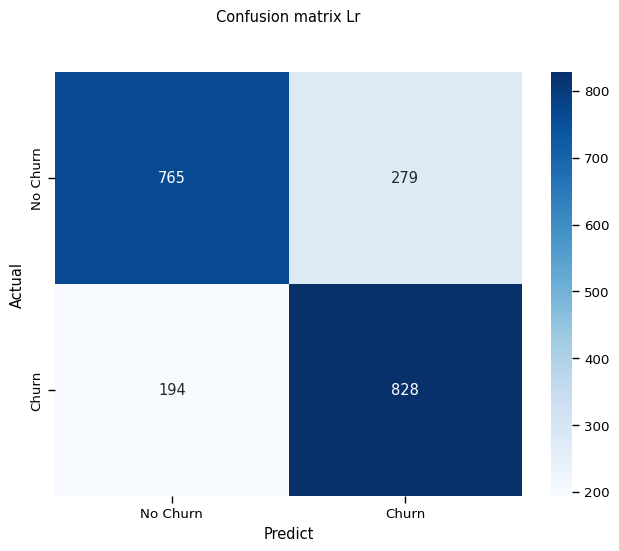

In [ ]:
# Confusion matrix
lr_matrix = confusion_matrix(y_test, y_pred_lr)
lr_matrix
## Visualization
x_labels = ["No Churn","Churn"]
y_labels = ["No Churn","Churn"]
# create heatmap
sns.heatmap(pd.DataFrame(lr_matrix), annot=True, cmap="Blues" ,fmt='g', xticklabels = x_labels, yticklabels = y_labels)
plt.tight_layout()
plt.title('Confusion matrix Lr', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predict')

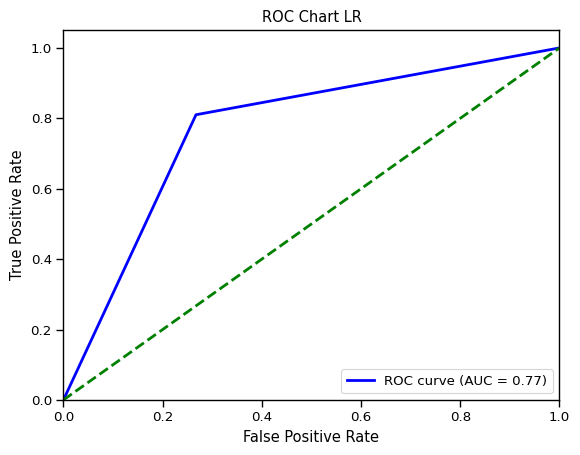

In [ ]:

# y_pred and y_true are the predicted and true labels, respectively
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Chart LR')
plt.legend(loc="lower right")
plt.show()

## 8.2 Decision Tree

In [ ]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77      1044
           1       0.75      0.83      0.79      1022

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066



Text(0.5, 22.71666666666666, 'Predict')

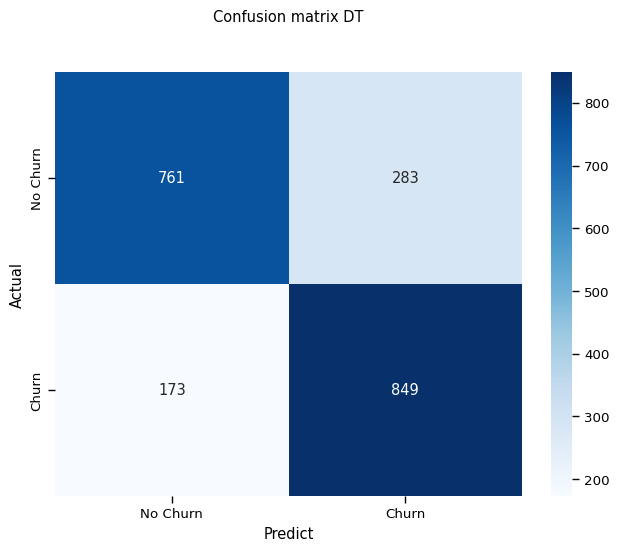

In [ ]:
# Confusion matrix
dt_matrix = confusion_matrix(y_test, y_pred_dt)
## Visualization
x_labels = ["No Churn","Churn"]
y_labels = ["No Churn","Churn"]
# create heatmap
sns.heatmap(pd.DataFrame(dt_matrix), annot=True, cmap="Blues" ,fmt='g', xticklabels = x_labels, yticklabels = y_labels)
plt.tight_layout()
plt.title('Confusion matrix DT', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predict')

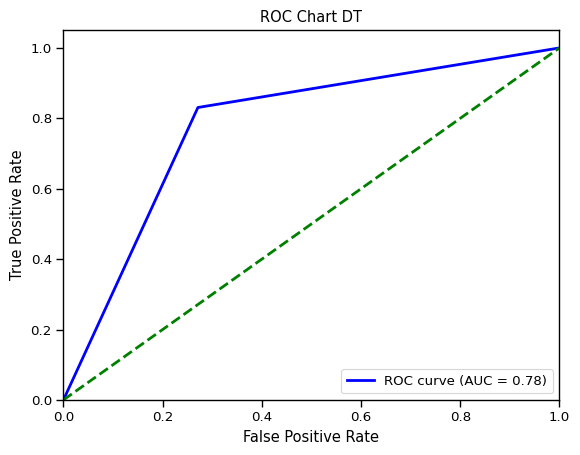

In [ ]:
# y_pred and y_true are the predicted and true labels, respectively
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Chart DT')
plt.legend(loc="lower right")
plt.show()

## 8.3 Random Forest

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1044
           1       0.80      0.86      0.83      1022

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066



Text(0.5, 22.71666666666666, 'Predict')

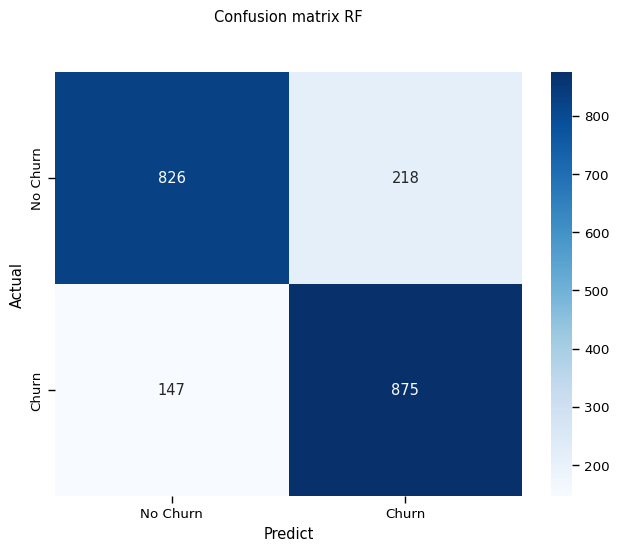

In [ ]:
# Confusion matrix
rf_matrix = confusion_matrix(y_test, y_pred_rf)
## Visualization
x_labels = ["No Churn","Churn"]
y_labels = ["No Churn","Churn"]
# create heatmap
sns.heatmap(pd.DataFrame(rf_matrix), annot=True, cmap="Blues" ,fmt='g', xticklabels = x_labels, yticklabels = y_labels)
plt.tight_layout()
plt.title('Confusion matrix RF', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predict')

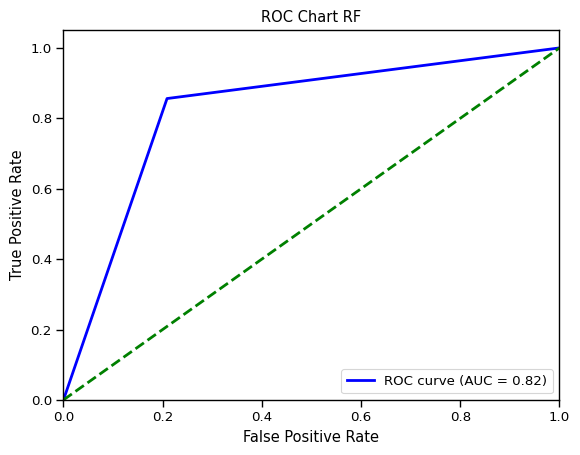

In [ ]:
# y_pred and y_true are the predicted and true labels, respectively
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Chart RF')
plt.legend(loc="lower right")
plt.show()

## 8.4 Gardienboosting

In [ ]:
print(classification_report(y_test, y_predict_gra))

              precision    recall  f1-score   support

           0       0.82      0.77      0.80      1044
           1       0.78      0.83      0.80      1022

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



Text(0.5, 22.71666666666666, 'Predict')

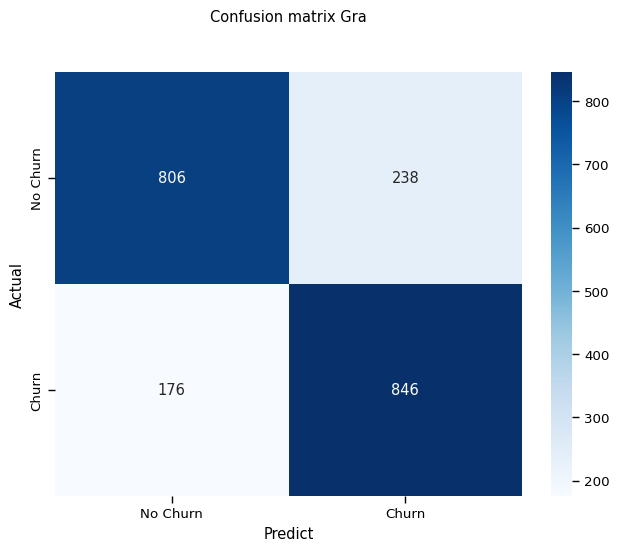

In [ ]:
# Confusion matrix
gr_matrix = confusion_matrix(y_test, y_predict_gra)
## Visualization
x_labels = ["No Churn","Churn"]
y_labels = ["No Churn","Churn"]
# create heatmap
sns.heatmap(pd.DataFrame(gr_matrix), annot=True, cmap="Blues" ,fmt='g', xticklabels = x_labels, yticklabels = y_labels)
plt.tight_layout()
plt.title('Confusion matrix Gra', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predict')

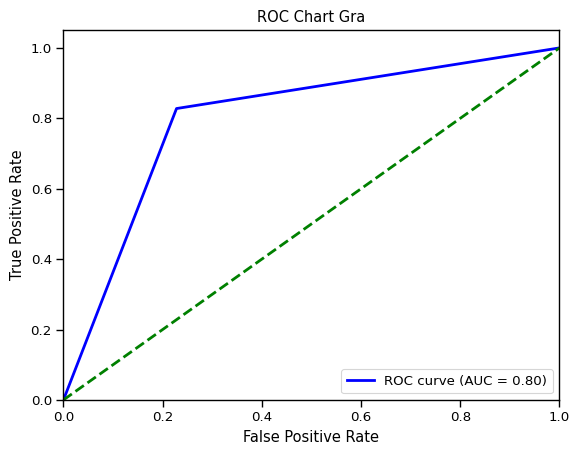

In [ ]:
# y_pred and y_true are the predicted and true labels, respectively
fpr, tpr, thresholds = roc_curve(y_test, y_predict_gra)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Chart Gra')
plt.legend(loc="lower right")
plt.show()

## 8.5 ADABOOST

In [ ]:
print(classification_report(y_test, y_predict_ada))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1044
           1       0.81      0.82      0.81      1022

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066



Text(0.5, 22.71666666666666, 'Predict')

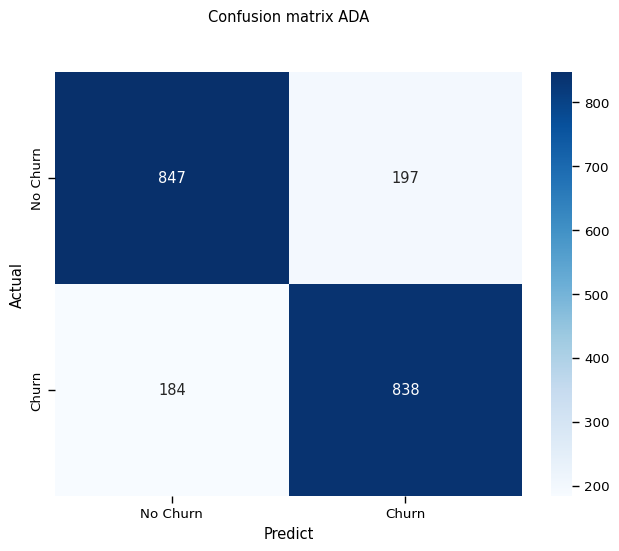

In [ ]:
# Confusion matrix
ada_matrix = confusion_matrix(y_test, y_predict_ada)
## Visualization
x_labels = ["No Churn","Churn"]
y_labels = ["No Churn","Churn"]
# create heatmap
sns.heatmap(pd.DataFrame(ada_matrix), annot=True, cmap="Blues" ,fmt='g', xticklabels = x_labels, yticklabels = y_labels)
plt.tight_layout()
plt.title('Confusion matrix ADA', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predict')

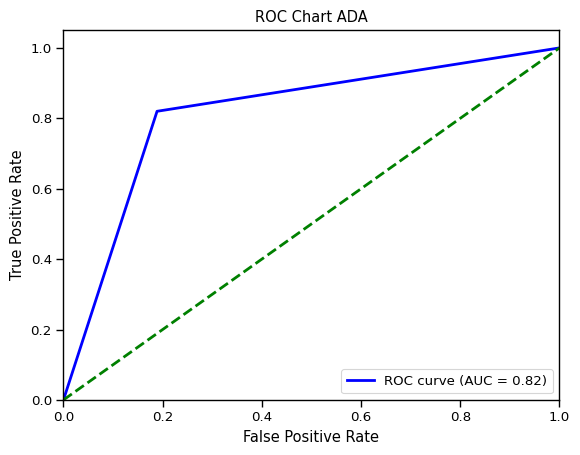

In [ ]:
# y_pred and y_true are the predicted and true labels, respectively
fpr, tpr, thresholds = roc_curve(y_test, y_predict_ada)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Chart ADA')
plt.legend(loc="lower right")
plt.show()

## 8.5 XGBOOST

In [ ]:
print(classification_report(y_test, y_predict_xgb))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1044
           1       0.82      0.84      0.83      1022

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



Text(0.5, 22.71666666666666, 'Predict')

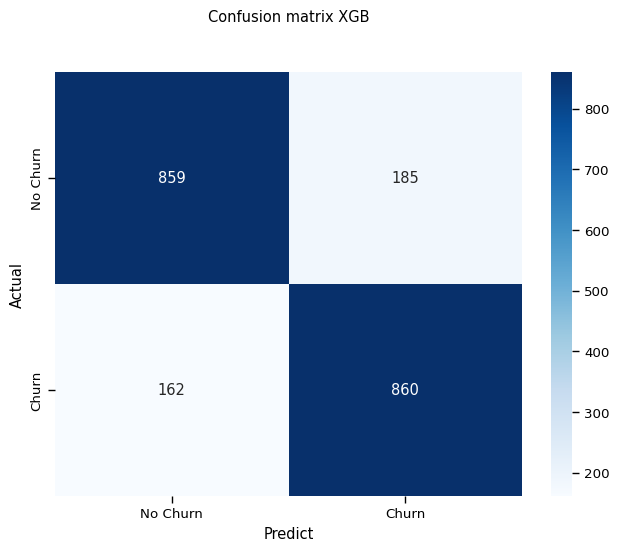

In [ ]:
# Confusion matrix
xgb_matrix = confusion_matrix(y_test, y_predict_xgb)
## Visualization
x_labels = ["No Churn","Churn"]
y_labels = ["No Churn","Churn"]
# create heatmap
sns.heatmap(pd.DataFrame(xgb_matrix), annot=True, cmap="Blues" ,fmt='g', xticklabels = x_labels, yticklabels = y_labels)
plt.tight_layout()
plt.title('Confusion matrix XGB', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predict')

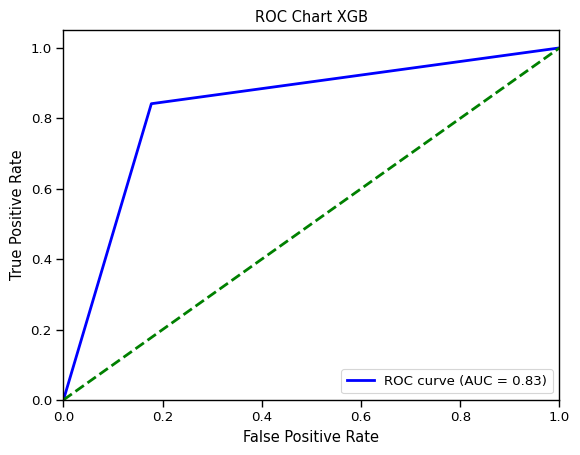

In [ ]:
# y_pred and y_true are the predicted and true labels, respectively
fpr, tpr, thresholds = roc_curve(y_test, y_predict_xgb)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Chart XGB')
plt.legend(loc="lower right")
plt.show()

## 8.6 lighGBM

In [ ]:
print(classification_report(y_test, y_predict_lightgbm))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1044
           1       0.82      0.82      0.82      1022

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066



Text(0.5, 22.71666666666666, 'Predict')

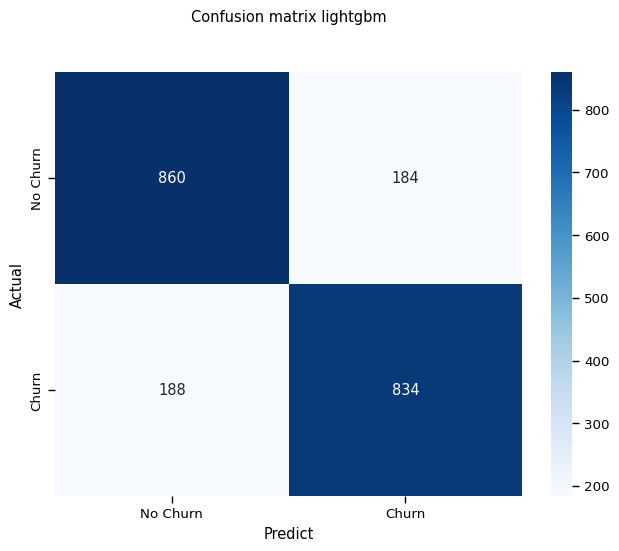

In [ ]:
# Confusion matrix
lightgbm_matrix = confusion_matrix(y_test, y_predict_lightgbm)
## Visualization
x_labels = ["No Churn","Churn"]
y_labels = ["No Churn","Churn"]
# create heatmap
sns.heatmap(pd.DataFrame(lightgbm_matrix), annot=True, cmap="Blues" ,fmt='g', xticklabels = x_labels, yticklabels = y_labels)
plt.tight_layout()
plt.title('Confusion matrix lightgbm', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predict')

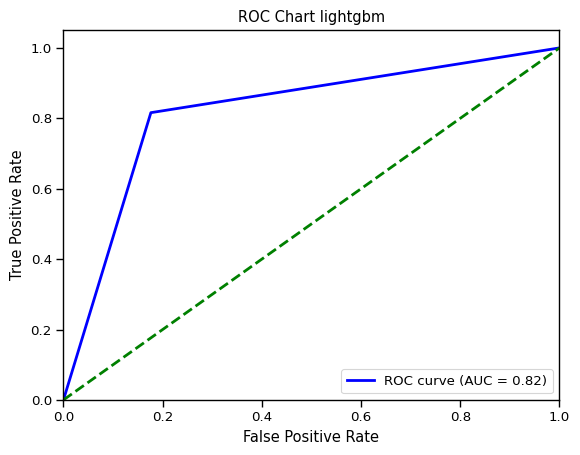

In [ ]:
# y_pred and y_true are the predicted and true labels, respectively
fpr, tpr, thresholds = roc_curve(y_test, y_predict_lightgbm)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Chart lightgbm')
plt.legend(loc="lower right")
plt.show()

# **9. Result**

- 3 model có chỉ số Accuracy ,f1 score và AUC cao nhất là Random forest , Lightgbm và XG boost

|Model| Accuracy| F1_Score| AUC|
|-----|---------|---------|----|
|Random Fores| 0.83| 0.8|0.82|
|XGBoost|0.83| 0.83| 0.83| 
|LightGBM|0.82| 0.82|0.82

- Các chỉ số ACC, F1_score và AUC của 3 mô hình tương đương nhau nhưng vì đây là bài toán phân loại để kiểm tra dự đoán tỉ lệ churn của các khách hàng thì có thể thấy là XGboost có sự phân loại tốt hơn -> chọn mô hình XGBOOST

In [ ]:
import xgboost as xgb
xgb = xgb.XGBClassifier()
xgb_predict = xgb.fit(x_train, y_train)

In [ ]:
## Create new data frame with x_test
x_test_df = pd.DataFrame(x_test)
## Predict propar of x_test
predict_proba = xgb_predict.predict_proba(x_test_df)[:,1]
## Result of predict (churn o no)
predict = xgb_predict.predict(x_test_df)
## Create new table
churn_customer_prob = pd.DataFrame({'predict_proba': predict_proba, 'predict': predict})

In [ ]:
churn_customer_prob['predict'].value_counts()

1    1045
0    1021
Name: predict, dtype: int64